# SimFin Tutorial 01 - The Basics

[Original repository on GitHub](https://github.com/simfin/simfin-tutorials)

This tutorial was originally written by [Hvass Labs](https://github.com/Hvass-Labs)

----

"Ladies and Gentlemen. We are proud to announce that we are officially open for business! Hazaa ... There's only like six of us here. And there's no ladies." &ndash; [Doraleous & Associates](https://www.youtube.com/watch?v=Dg1mxlzEP3Q)

## Introduction

Financial data used to be very expensive, typically costing USD 10-20,000 for an annual subscription, making it impossible for ordinary people to obtain the data. It was limited to banks and hedge funds which usually keep their research private, and academia which has proven unable to turn finance theory into a real science.

With the advent of XBRL data, US companies are now required to publish their financial data in digital form, which means it can be collected automatically into a database. Unfortunately, there are several challenges in collecting and standardizing the data, so companies have sprung up to provide that service at a very low cost.

However, the new data providers often have a complicated API, which is very far from how people will actually use the data. Every user has to build the infrastructure for downloading the data, saving it to disk, and loading it into a format that can actually be used in research and production.

The [SimFin Python API](https://www.github.com/SimFin/simfin) solves all these problems with a simple and elegant API, making it very easy to download and use the financial data. Furthermore, the basic SimFin datasets are all free, so you can easily share your research in Python Notebooks that automatically download the financial data, when people run the Notebook on their own computer or in the cloud using e.g. Google Colab.

This is a game-changer in how financial research can be created and shared. Hopefully it can break the monopoly of academia and the financial industry, so everyone with a good idea can now do research in finance.

This tutorial shows the basics of using the SimFin Python API. The tutorial has two main parts. The first part is about the SimFin Python API, and the second part is a more general introduction to Pandas.

There is a convenient [web-page](https://simfin.com/data/bulk) with a list of the available datasets and their content, along with the Python code for loading them. You may want to bookmark that web-page in your internet browser, as it will save you a lot of time when working with the SimFin API.

## Installation

SimFin is available as a Python package for easy installation. To install SimFin you simply need to execute the following command (remove the \# first).

In [1]:
# !pip install simfin

### Virtual Environments

It is best to use a virtual environment when installing Python packages, so they are not installed inside your main Python installation. That makes it easy to remove the packages if something goes wrong. Please see the README file for this tutorial, for a detailed explanation on how to create virtual environments.

### Google Colab

If you do not wish to install anything on your local computer, you can run these tutorials entirely in the cloud using the free [Google Colab](https://colab.research.google.com) service. All the required Python packages should already be installed on Google Colab, except for SimFin which you can install by executing the above command. A virtual / temporary environment is automatically created on Google Colab each time you login, so you can install SimFin directly.

## Imports

In [1]:
%matplotlib inline
import pandas as pd

# Import the main functionality from the SimFin Python API.
import simfin as sf

# Import names used for easy access to SimFin's data-columns.
from simfin.names import *

In [2]:
# Version of the SimFin Python API.
sf.__version__

'0.8.1'

## Data Directory

Before using SimFin, you need to set the directory where the data is downloaded and stored. The directory is created automatically if it does not exist. If you forget to set this, then the data will be stored in your current directory.

In [3]:
sf.set_data_dir('~/simfin_data/')

## API Key

SimFin provides both free and paid versions of its data. Anyone can download the free data by using the API key 'free'. Visit [SimFin](https://simfin.com/data/bulk) for a comparison of the free and paid data versions, and to obtain your own API key.

In [4]:
sf.set_api_key(api_key='free')

The API key can also be loaded from disk. If the file doesn't exist, then it uses the default 'free' API key. This is useful if you want to share your Notebooks with others, without revealing your private API key.

In [5]:
# sf.load_api_key(path='~/simfin_api_key.txt', default_key='free')

## General Load Function

The general function for downloading and loading the bulk-data from the SimFin server is `sf.load()` which takes several arguments, with the main arguments being:

- The `dataset` to download e.g. 'income' for Income Statements, 'balance' for Balance Sheets, or 'cashflow' for Cash-Flow Statements, 'shareprices' for Share Prices, etc.

- The `variant` of the given dataset e.g. 'annual', 'quarterly' and 'ttm' (Trailing-Twelve-Months) for financial reports, or 'latest' and 'daily' for share-price data.

- The `market` for the dataset e.g. 'us' for USA or 'de' for Germany (Deutschland).

For example, we can use the `sf.load()` function to download and load all the annual Income Statements from the SimFin database into a Pandas DataFrame. The fundamental datasets are fairly small (a few MB per file) and should download and load very quickly.

In [9]:
df1 = sf.load(dataset='income', variant='annual', market='us')

Dataset "us-income-annual" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


This gives us a Pandas DataFrame with all the data.

In [10]:
df1.head()

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
0,A,45846,USD,2008,FY,2008-10-31,2009-01-05,2010-12-20,363000000.0,371000000.0,...,20000000.0,-10000000.0,815000000,0.0,815000000,-122000000.0,693000000,NaN,693000000,693000000
1,A,45846,USD,2009,FY,2009-10-31,2009-12-21,2011-12-16,346000000.0,346000000.0,...,-40000000.0,-59000000.0,7000000,0.0,7000000,-38000000.0,-31000000,NaN,-31000000,-31000000
2,A,45846,USD,2010,FY,2010-10-31,2010-12-08,2012-12-20,347000000.0,353000000.0,...,-6000000.0,-76000000.0,560000000,132000000.0,692000000,-8000000.0,684000000,NaN,684000000,684000000
3,A,45846,USD,2011,FY,2011-10-31,2011-12-16,2013-12-19,347000000.0,355000000.0,...,-39000000.0,-72000000.0,1032000000,NaN,1032000000,-20000000.0,1012000000,NaN,1012000000,1012000000
4,A,45846,USD,2012,FY,2012-10-31,2012-12-20,2014-12-22,348000000.0,353000000.0,...,-76000000.0,-92000000.0,1043000000,NaN,1043000000,110000000.0,1153000000,NaN,1153000000,1153000000


### Refresh Data

By default the data-files are downloaded every 30 days, which is a good choice for the free datasets, because the free data is several months old and is updated infrequently. We can set a different time-limit by passing the argument `refresh_days` to the `load()` function and its specializations described below. A value of `refresh_days=0` forces download of the dataset, regardless of when you downloaded it last and how old the data-file is on your disk. But even for paying subscribers, the SimFin server only updates the data-files daily, so you would normally use `refresh_days >= 1`. For example, if we want to refresh the data every 3 days:

In [11]:
df1 = sf.load(dataset='income', variant='annual', market='us',
              refresh_days=3)

Dataset "us-income-annual" on disk (0 days old).
- Loading from disk ... Done!


### Data Names

The data columns can be selected by their full names, for example:

In [12]:
df1['Selling, General & Administrative']

0       -1.697000e+09
1       -1.603000e+09
2       -1.752000e+09
3       -1.809000e+09
4       -1.817000e+09
             ...     
17113   -1.410500e+10
17114   -1.512900e+10
17115   -1.537600e+10
17116   -1.741300e+10
17117   -1.536700e+10
Name: Selling, General & Administrative, Length: 17118, dtype: float64

Some of the column-names are long and it is easy to make a mistake when typing them, so for convenience, there are short-hand names and brief explanations of all the data-columns in the `names` module that was imported further above. For example:

In [13]:
SGA

'Selling, General & Administrative'

In [14]:
df1[SGA]

0       -1.697000e+09
1       -1.603000e+09
2       -1.752000e+09
3       -1.809000e+09
4       -1.817000e+09
             ...     
17113   -1.410500e+10
17114   -1.512900e+10
17115   -1.537600e+10
17116   -1.741300e+10
17117   -1.536700e+10
Name: Selling, General & Administrative, Length: 17118, dtype: float64

The module `names.py` is auto-generated from definitions on the SimFin server. The [SimFin website](https://simfin.com/data/bulk) shows all of the column-names in the datasets where they belong, along with explanations of their meaning. The explanations are also noted in `names.py`

### Indexing the DataFrame

The above DataFrame is not indexed by either the Ticker or any of the dates, so it is difficult to work with. The `sf.load()` function can also do this indexing for us, if we provide more arguments to the function. For example, if we want to index by the columns named "Ticker" and "Report Date" we pass those as an argument to the `sf.load()` function. Furthermore, we can instruct the `sf.load()` function to parse columns in the DataFrame that contain dates.

The reason these arguments have to be specified, is that the names of these data-columns are different amongst datasets. Specialized functions are shown further below, where the correct arguments are passed automatically for the different datasets.

In [15]:
df2 = sf.load(dataset='income', variant='annual', market='us',
              index=[TICKER, REPORT_DATE],
              parse_dates=[REPORT_DATE, PUBLISH_DATE, RESTATED_DATE])

Dataset "us-income-annual" on disk (0 days old).
- Loading from disk ... Done!


In [16]:
df2.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2008-10-31      45846      USD         2008            FY   2009-01-05   
       2009-10-31      45846      USD         2009            FY   2009-12-21   
       2010-10-31      45846      USD         2010            FY   2010-12-08   
       2011-10-31      45846      USD         2011            FY   2011-12-16   
       2012-10-31      45846      USD         2012            FY   2012-12-20   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2008-10-31     2010-12-20     363000000.0       371000000.0   
       2009-10-31     2011-12-16     346000000.0       346000000.0   
       2010-10-31     2012-12-20     347000000.0       353000000.0   
       2011-10-31     2013-12-19     347000000.0       355000000.0   
       2012-10-31     2014-12-22     348000000.0       353000000.0   

                         Revenue  Cost of Revenue  ...  \
Ticker Report Date                                 ...   
A      2008-10-31   5.774000e+09    -2.578000e+09  ...   
       2009-10-31   4.481000e+09    -2.189000e+09  ...   
       2010-10-31   5.444000e+09    -2.514000e+09  ...   
       2011-10-31   6.615000e+09    -3.086000e+09  ...   
       2012-10-31   6.858000e+09    -3.254000e+09  ...   

                    Non-Operating Income (Loss)  Interest Expense, Net  \
Ticker Report Date                                                       
A      2008-10-31                    20000000.0            -10000000.0   
       2009-10-31                   -40000000.0            -59000000.0   
       2010-10-31                    -6000000.0            -76000000.0   
       2011-10-31                   -39000000.0            -72000000.0   
       2012-10-31                   -76000000.0            -92000000.0   

                    Pretax Income (Loss), Adj.  Abnormal Gains (Losses)  \
Ticker Report Date                                                        
A      2008-10-31                    815000000                      0.0   
       2009-10-31                      7000000                      0.0   
       2010-10-31                    560000000              132000000.0   
       2011-10-31                   1032000000                      NaN   
       2012-10-31                   1043000000                      NaN   

                    Pretax Income (Loss)  Income Tax (Expense) Benefit, Net  \
Ticker Report Date                                                            
A      2008-10-31              815000000                       -122000000.0   
       2009-10-31                7000000                        -38000000.0   
       2010-10-31              692000000                         -8000000.0   
       2011-10-31             1032000000                        -20000000.0   
       2012-10-31             1043000000                        110000000.0   

                    Income (Loss) from Continuing Operations  \
Ticker Report Date                                             
A      2008-10-31                                  693000000   
       2009-10-31                                  -31000000   
       2010-10-31                                  684000000   
       2011-10-31                                 1012000000   
       2012-10-31                                 1153000000   

                    Net Extraordinary Gains (Losses)  Net Income  \
Ticker Report Date                                                 
A      2008-10-31                                NaN   693000000   
       2009-10-31                                NaN   -31000000   
       2010-10-31                                NaN   684000000   
       2011-10-31                                NaN  1012000000   
       2012-10-31                                NaN  1153000000   

                    Net Incom

### Lookup Ticker

The DataFrame has now been indexed by both the Ticker and Report Date, so we can easily lookup the data for individual tickers e.g. MSFT for Microsoft:

In [17]:
df2.loc['MSFT']

,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
Report Date,,,,,,,,,,,,,,,,,,,,,
2009-06-30,59265,USD,2009,FY,2009-07-22,2011-07-28,8.945000e+09,8.996000e+09,5.843700e+10,-1.215500e+10,...,-5.420000e+08,NaN,19821000000,NaN,19821000000,-5.252000e+09,14569000000,NaN,14569000000,14569000000
2010-06-30,59265,USD,2010,FY,2010-07-30,2012-07-26,8.813000e+09,8.927000e+09,6.248400e+10,-1.239500e+10,...,9.150000e+08,NaN,25013000000,0.000000e+00,25013000000,-6.253000e+09,18760000000,NaN,18760000000,18760000000
2011-06-30,59265,USD,2011,FY,2011-07-28,2013-07-30,8.490000e+09,8.593000e+09,6.994300e+10,-1.557700e+10,...,9.100000e+08,NaN,28071000000,0.000000e+00,28071000000,-4.921000e+09,23150000000,NaN,23150000000,23150000000
2012-06-30,59265,USD,2012,FY,2012-07-26,2014-07-31,8.396000e+09,8.506000e+09,7.372300e+10,-1.753000e+10,...,5.040000e+08,NaN,28460000000,-6.193000e+09,22267000000,-5.289000e+09,16978000000,NaN,16978000000,16978000000
2013-06-30,59265,USD,2013,FY,2013-07-30,2015-07-31,8.375000e+09,8.470000e+09,7.784900e+10,-2.038500e+10,...,2.880000e+08,NaN,27052000000,0.000000e+00,27052000000,-5.189000e+09,21863000000,NaN,21863000000,21863000000
2014-06-30,59265,USD,2014,FY,2014-07-31,2016-07-28,8.299000e+09,8.399000e+09,8.683300e+10,-2.707800e+10,...,6.100000e+07,NaN,27947000000,-1.270000e+08,27820000000,-5.746000e+09,22074000000,NaN,22074000000,22074000000
2015-06-30,59265,USD,2015,FY,2015-07-31,2017-08-02,8.177000e+09,8.254000e+09,9.358000e+10,-3.303800e+10,...,3.460000e+08,NaN,28518000000,-1.001100e+10,18507000000,-6.314000e+09,12193000000,NaN,12193000000,12193000000
2016-06-30,59265,USD,2016,FY,2016-07-28,2018-08-03,7.925000e+09,8.013000e+09,9.115400e+10,-3.278000e+10,...,-4.390000e+08,NaN,26749000000,-1.110000e+09,25639000000,-5.100000e+09,20539000000,NaN,20539000000,20539000000
2017-06-30,59265,USD,2017,FY,2017-07-27,2018-08-03,7.746000e+09,7.832000e+09,9.657100e+10,-3.426100e+10,...,8.760000e+08,NaN,30207000000,-3.060000e+08,29901000000,-4.412000e+09,25489000000,NaN,25489000000,25489000000


From this DataFrame we can easily extract individual columns such as the Revenue:

In [18]:
df2.loc['MSFT'][REVENUE]

Report Date
2009-06-30    5.843700e+10
2010-06-30    6.248400e+10
2011-06-30    6.994300e+10
2012-06-30    7.372300e+10
2013-06-30    7.784900e+10
2014-06-30    8.683300e+10
2015-06-30    9.358000e+10
2016-06-30    9.115400e+10
2017-06-30    9.657100e+10
2018-06-30    1.103600e+11
2019-06-30    1.258430e+11
2020-06-30    1.430150e+11
Name: Revenue, dtype: float64

We can also plot this data:

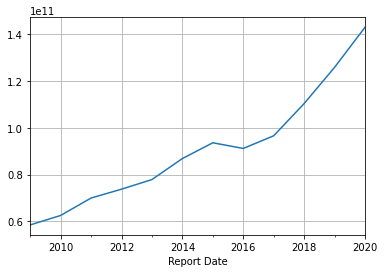

In [19]:
df2.loc['MSFT'][REVENUE].plot(grid=True)

## Specialized Load Functions

Some of the datasets have specialized load functions that automatically set the correct arguments for indexing and parsing dates. These functions all default to market 'us' (USA).

### Load Income Statements

The dataset for Income Statements can also be loaded with the specialized function `sf.load_income()` which takes arguments for the dataset variant and market:

In [20]:
df_income = sf.load_income(variant='annual', market='us')

Dataset "us-income-annual" on disk (0 days old).
- Loading from disk ... Done!


In [21]:
df_income.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2008-10-31      45846      USD         2008            FY   2009-01-05   
       2009-10-31      45846      USD         2009            FY   2009-12-21   
       2010-10-31      45846      USD         2010            FY   2010-12-08   
       2011-10-31      45846      USD         2011            FY   2011-12-16   
       2012-10-31      45846      USD         2012            FY   2012-12-20   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2008-10-31     2010-12-20     363000000.0       371000000.0   
       2009-10-31     2011-12-16     346000000.0       346000000.0   
       2010-10-31     2012-12-20     347000000.0       353000000.0   
       2011-10-31     2013-12-19     347000000.0       355000000.0   
       2012-10-31     2014-12-22     348000000.0       353000000.0   

                         Revenue  Cost of Revenue  ...  \
Ticker Report Date                                 ...   
A      2008-10-31   5.774000e+09    -2.578000e+09  ...   
       2009-10-31   4.481000e+09    -2.189000e+09  ...   
       2010-10-31   5.444000e+09    -2.514000e+09  ...   
       2011-10-31   6.615000e+09    -3.086000e+09  ...   
       2012-10-31   6.858000e+09    -3.254000e+09  ...   

                    Non-Operating Income (Loss)  Interest Expense, Net  \
Ticker Report Date                                                       
A      2008-10-31                    20000000.0            -10000000.0   
       2009-10-31                   -40000000.0            -59000000.0   
       2010-10-31                    -6000000.0            -76000000.0   
       2011-10-31                   -39000000.0            -72000000.0   
       2012-10-31                   -76000000.0            -92000000.0   

                    Pretax Income (Loss), Adj.  Abnormal Gains (Losses)  \
Ticker Report Date                                                        
A      2008-10-31                    815000000                      0.0   
       2009-10-31                      7000000                      0.0   
       2010-10-31                    560000000              132000000.0   
       2011-10-31                   1032000000                      NaN   
       2012-10-31                   1043000000                      NaN   

                    Pretax Income (Loss)  Income Tax (Expense) Benefit, Net  \
Ticker Report Date                                                            
A      2008-10-31              815000000                       -122000000.0   
       2009-10-31                7000000                        -38000000.0   
       2010-10-31              692000000                         -8000000.0   
       2011-10-31             1032000000                        -20000000.0   
       2012-10-31             1043000000                        110000000.0   

                    Income (Loss) from Continuing Operations  \
Ticker Report Date                                             
A      2008-10-31                                  693000000   
       2009-10-31                                  -31000000   
       2010-10-31                                  684000000   
       2011-10-31                                 1012000000   
       2012-10-31                                 1153000000   

                    Net Extraordinary Gains (Losses)  Net Income  \
Ticker Report Date                                                 
A      2008-10-31                                NaN   693000000   
       2009-10-31                                NaN   -31000000   
       2010-10-31                                NaN   684000000   
       2011-10-31                                NaN  1012000000   
       2012-10-31                                NaN  1153000000   

                    Net Incom

### Load Balance Sheets

The dataset for Balance Sheets can also be loaded with the specialized function `sf.load_balance()` which takes arguments for the dataset variant and market:

In [22]:
df_balance = sf.load_balance(variant='annual', market='us')

Dataset "us-balance-annual" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


In [23]:
df_balance.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2008-10-31      45846      USD         2008            Q4   2009-01-05   
       2009-10-31      45846      USD         2009            Q4   2009-12-21   
       2010-10-31      45846      USD         2010            Q4   2010-12-08   
       2011-10-31      45846      USD         2011            Q4   2011-12-16   
       2012-10-31      45846      USD         2012            Q4   2012-12-20   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2008-10-31     2009-12-21     357000000.0       359000000.0   
       2009-10-31     2010-12-20     343000000.0       343000000.0   
       2010-10-31     2011-12-16     344000000.0       356000000.0   
       2011-10-31     2012-12-20     346000000.0       353000000.0   
       2012-10-31     2013-12-19     348000000.0       353000000.0   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Report Date                                                    
A      2008-10-31                                      1.429000e+09   
       2009-10-31                                      2.493000e+09   
       2010-10-31                                      2.649000e+09   
       2011-10-31                                      3.527000e+09   
       2012-10-31                                      2.351000e+09   

                    Accounts & Notes Receivable  ...  Short Term Debt  \
Ticker Report Date                               ...                    
A      2008-10-31                   770000000.0  ...              NaN   
       2009-10-31                   595000000.0  ...     1.000000e+06   
       2010-10-31                   869000000.0  ...     1.501000e+09   
       2011-10-31                   860000000.0  ...     2.530000e+08   
       2012-10-31                   923000000.0  ...     2.500000e+08   

                    Total Current Liabilities  Long Term Debt  \
Ticker Report Date                                              
A      2008-10-31                1.330000e+09    2.125000e+09   
       2009-10-31                1.123000e+09    2.904000e+09   
       2010-10-31                3.083000e+09    2.190000e+09   
       2011-10-31                1.837000e+09    1.932000e+09   
       2012-10-31                1.893000e+09    2.112000e+09   

                    Total Noncurrent Liabilities  Total Liabilities  \
Ticker Report Date                                                    
A      2008-10-31                   3.118000e+09         4448000000   
       2009-10-31                   3.975000e+09         5098000000   
       2010-10-31                   3.377000e+09         6460000000   
       2011-10-31                   2.904000e+09         4741000000   
       2012-10-31                   3.458000e+09         5351000000   

                    Share Capital & Additional Paid-In Capital  \
Ticker Report Date                                               
A      2008-10-31                                 7.416000e+09   
       2009-10-31                                 7.558000e+09   
       2010-10-31                                 7.910000e+09   
       2011-10-31                                 8.271000e+09   
       2012-10-31                                 8.495000e+09   

                    Treasury Stock  Retained Earnings  Total Equity  \
Ticker Report Date                                                    
A      2008-10-31    -7.470000e+09       2.791000e+09  2.559000e+09   
       2009-10-31    -7.627000e+09       2.760000e+09  2.514000e+09   
       2010-10-31    -8.038000e+09       3.444000e+09  3.236000e+09   
       2011-10-31    -8.535000e+09       4.456000e+09  4.316000e+09   
       2012-10-31    -8.707000e+09       5.505000e+09  5.185000e+09   

                    Total Liabilitie

### Load Cash-Flow Statements

The dataset for Cash-Flow Statements can also be loaded with the specialized function `sf.load_cashflow()` which takes arguments for the dataset variant and market:

In [24]:
df_cashflow = sf.load_cashflow(variant='annual', market='us')

Dataset "us-cashflow-annual" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


In [25]:
df_cashflow.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2008-10-31      45846      USD         2008            FY   2009-01-05   
       2009-10-31      45846      USD         2009            FY   2009-12-21   
       2010-10-31      45846      USD         2010            FY   2010-12-08   
       2011-10-31      45846      USD         2011            FY   2011-12-16   
       2012-10-31      45846      USD         2012            FY   2012-12-20   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2008-10-31     2010-12-20     363000000.0       371000000.0   
       2009-10-31     2011-12-16     346000000.0       346000000.0   
       2010-10-31     2012-12-20     347000000.0       353000000.0   
       2011-10-31     2013-12-19     347000000.0       355000000.0   
       2012-10-31     2014-12-22     348000000.0       353000000.0   

                    Net Income/Starting Line  Depreciation & Amortization  \
Ticker Report Date                                                          
A      2008-10-31               6.930000e+08                  201000000.0   
       2009-10-31              -3.100000e+07                  162000000.0   
       2010-10-31               6.840000e+08                  202000000.0   
       2011-10-31               1.012000e+09                  253000000.0   
       2012-10-31               1.153000e+09                  301000000.0   

                    ...  Net Cash from Operating Activities  \
Ticker Report Date  ...                                       
A      2008-10-31   ...                           756000000   
       2009-10-31   ...                           408000000   
       2010-10-31   ...                           718000000   
       2011-10-31   ...                          1260000000   
       2012-10-31   ...                          1228000000   

                    Change in Fixed Assets & Intangibles  \
Ticker Report Date                                         
A      2008-10-31                           -140000000.0   
       2009-10-31                           -127000000.0   
       2010-10-31                           -114000000.0   
       2011-10-31                           -170000000.0   
       2012-10-31                           -194000000.0   

                    Net Change in Long Term Investment  \
Ticker Report Date                                       
A      2008-10-31                          150000000.0   
       2009-10-31                           94000000.0   
       2010-10-31                           38000000.0   
       2011-10-31                           16000000.0   
       2012-10-31                            5000000.0   

                    Net Cash from Acquisitions & Divestitures  \
Ticker Report Date                                              
A      2008-10-31                               -1.720000e+08   
       2009-10-31                                4.300000e+07   
       2010-10-31                               -1.108000e+09   
       2011-10-31                               -9.700000e+07   
       2012-10-31                               -2.257000e+09   

                    Net Cash from Investing Activities  Dividends Paid  \
Ticker Report Date                                                       
A      2008-10-31                        -3.850000e+08             NaN   
       2009-10-31                        -4.000000e+06             NaN   
       2010-10-31                        -1.174000e+09             0.0   
       2011-10-31                         1.294000e+09             0.0   
       2012-10-31                        -2.366000e+09    -104000000.0   

                    Cash from (Repayment of) Debt  \
Ticker Report Date                                  
A      2008-10-31                    1.600000e+07   
       2009-10-31

### Load Derived Figures & Ratios

If you have a SimFin+ subscription, you can also load the derived figures & ratios dataset. Basically this dataset contains pre-calculated fundamental ratios (price ratios are in a different dataset, see section "Load Share Price Ratios" for details). To load the ratios, simply run:

In [6]:
# note: this will throw an error if you didn't specify a valid API key via sf.set_api_key or sf.load_api_key
try:
    df_ratios = sf.load_derived(variant='annual', market='us')
except Exception as e:
    print(e)

Dataset "us-derived-annual" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


In [11]:
# note: this will throw an error if you didn't specify a valid API key via sf.set_api_key or sf.load_api_key
try:
    display(df_ratios.head())
except Exception as e:
    print(e)

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2008-10-31      45846      USD         2008            FY   2009-01-05   
       2009-10-31      45846      USD         2009            FY   2009-12-21   
       2010-10-31      45846      USD         2010            FY   2010-12-08   
       2011-10-31      45846      USD         2011            FY   2011-12-16   
       2012-10-31      45846      USD         2012            FY   2012-12-20   

                   Restated Date        EBITDA  Total Debt  Free Cash Flow  \
Ticker Report Date                                                           
A      2008-10-31     2010-12-20  9.960000e+08  2125000000     799000000.0   
       2009-10-31     2011-12-16  2.090000e+08  2905000000     182000000.0   
       2010-10-31     2012-12-20  7.680000e+08  3691000000     610000000.0   
       2011-10-31     2013-12-19  1.324000e+09  2185000000     950000000.0   
       2012-10-31     2014-12-22  1.420000e+09  2362000000     940000000.0   

                    Gross Profit Margin  ...  Current Ratio  \
Ticker Report Date                       ...                  
A      2008-10-31               0.55352  ...        2.39248   
       2009-10-31               0.51149  ...        3.52716   
       2010-10-31               0.53821  ...        2.00097   
       2011-10-31               0.53348  ...        3.03157   
       2012-10-31               0.52552  ...        2.44532   

                    Liabilities to Equity Ratio  Debt Ratio  \
Ticker Report Date                                            
A      2008-10-31                       1.73818     0.30327   
       2009-10-31                       2.02784     0.38163   
       2010-10-31                       1.99629     0.38067   
       2011-10-31                       1.09847     0.24125   
       2012-10-31                       1.03202     0.22418   

                    Earnings Per Share, Basic  Earnings Per Share, Diluted  \
Ticker Report Date                                                           
A      2008-10-31                     1.90909                      1.86792   
       2009-10-31                    -0.08960                     -0.08960   
       2010-10-31                     1.97118                      1.93768   
       2011-10-31                     2.91643                      2.85070   
       2012-10-31                     3.31322                      3.26629   

                    Sales Per Share  Equity Per Share  \
Ticker Report Date                                      
A      2008-10-31          15.90634           7.04959   
       2009-10-31          12.95087           7.24277   
       2010-10-31          15.68876           9.30259   
       2011-10-31          19.06340          12.41499   
       2012-10-31          19.70690          14.89080   

                    Free Cash Flow Per Share  Dividends Per Share  \
Ticker Report Date                                                  
A      2008-10-31                    2.20110                  NaN   
       2009-10-31                    0.52601                  NaN   
       2010-10-31                    1.75793              0.00000   
       2011-10-31                    2.73775              0.00000   
       2012-10-31                    2.70115              0.29885   

                    Pietroski F-Score  
Ticker Report Date                     
A      2008-10-31                 NaN  
       2009-10-31                 NaN  
       2010-10-31                 7.0  
       2011-10-31                 7.0  
       2012-10-31                 5.0  

[5 rows x 25 columns]

A comprehensive list of all currently available ratios can be found [here](https://simfin.com/data/bulk?dataset=derived&variant=annual&market=us).

### Report Date vs. Publish Date vs. Restated Date

By default the functions `sf.load_income()`, `sf.load_balance()` and `sf.load_cashflow()` use the Report Date as an index, but it can be switched to use the Publish Date instead, by setting the index argument. We give a list of the indices we want in the resulting DataFrame, in this case we want both the Ticker and Publish Date.

In [39]:
df_income2 = sf.load_income(variant='annual', market='us',
                            index=[TICKER, PUBLISH_DATE])

Dataset "us-income-annual" on disk (0 days old).
- Loading from disk ... Done!


In [40]:
df_income2.head()

SimFinId Currency  Fiscal Year Fiscal Period Report Date  \
Ticker Publish Date                                                             
A      2009-01-05       45846      USD         2008            FY  2008-10-31   
       2009-12-21       45846      USD         2009            FY  2009-10-31   
       2010-12-08       45846      USD         2010            FY  2010-10-31   
       2011-12-16       45846      USD         2011            FY  2011-10-31   
       2012-12-20       45846      USD         2012            FY  2012-10-31   

                    Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Publish Date                                                   
A      2009-01-05      2010-12-20     363000000.0       371000000.0   
       2009-12-21      2011-12-16     346000000.0       346000000.0   
       2010-12-08      2012-12-20     347000000.0       353000000.0   
       2011-12-16      2013-12-19     347000000.0       355000000.0   
       2012-12-20      2014-12-22     348000000.0       353000000.0   

                          Revenue  Cost of Revenue  ...  \
Ticker Publish Date                                 ...   
A      2009-01-05    5.774000e+09    -2.578000e+09  ...   
       2009-12-21    4.481000e+09    -2.189000e+09  ...   
       2010-12-08    5.444000e+09    -2.514000e+09  ...   
       2011-12-16    6.615000e+09    -3.086000e+09  ...   
       2012-12-20    6.858000e+09    -3.254000e+09  ...   

                     Non-Operating Income (Loss)  Interest Expense, Net  \
Ticker Publish Date                                                       
A      2009-01-05                     20000000.0            -10000000.0   
       2009-12-21                    -40000000.0            -59000000.0   
       2010-12-08                     -6000000.0            -76000000.0   
       2011-12-16                    -39000000.0            -72000000.0   
       2012-12-20                    -76000000.0            -92000000.0   

                     Pretax Income (Loss), Adj.  Abnormal Gains (Losses)  \
Ticker Publish Date                                                        
A      2009-01-05                     815000000                      0.0   
       2009-12-21                       7000000                      0.0   
       2010-12-08                     560000000              132000000.0   
       2011-12-16                    1032000000                      NaN   
       2012-12-20                    1043000000                      NaN   

                     Pretax Income (Loss)  Income Tax (Expense) Benefit, Net  \
Ticker Publish Date                                                            
A      2009-01-05               815000000                       -122000000.0   
       2009-12-21                 7000000                        -38000000.0   
       2010-12-08               692000000                         -8000000.0   
       2011-12-16              1032000000                        -20000000.0   
       2012-12-20              1043000000                        110000000.0   

                     Income (Loss) from Continuing Operations  \
Ticker Publish Date                                             
A      2009-01-05                                   693000000   
       2009-12-21                                   -31000000   
       2010-12-08                                   684000000   
       2011-12-16                                  1012000000   
       2012-12-20                                  1153000000   

                     Net Extraordinary Gains (Losses)  Net Income  \
Ticker Publish Date                                                 
A      2009-01-05                                 NaN   693000000   
       2009-12-21                                 NaN   -31000000   
       2010-12-08                                 NaN   684000000   
       2011-12-16                                 NaN  1012000000   
       2012-12-20                                 N

The difference is as follows:

- **Report Date** is the date of the financial report, but this is not the date when the report was published. For example, an annual report with a Report Date of 2018-12-31 means that the period of the financial report is the 12 months ending on that date.

- **Publish Date** is the date the financial report was made available to the public. For example, a financial report for the 12 months ending on 2018-12-31 may first have been made public a few months later e.g. on 2019-02-05.

- **Restated Date** is the last date that the financial report was restated by the company. It is possible that a financial report has been restated multiple times, in which case this is the most recent date that it was restated. If the report was never restated, then this date will be the same as the Publish Date.

Also note the following:

- The standard SimFin datasets always use the newest available data from the latest restatement. So even though the Publish Date is e.g. 2019-02-05, if the Restated Date is e.g. 2020-03-17 then the financial data is actually from this latter date. So the SimFin datasets are not so-called "point-in-time" data.

- For US companies, the Publish Date is for the Form 10-K or 10-Q which are the official annual and quarterly reports. Sometimes companies publish preliminary earnings reports in a Form 8-K, but those are not considered for the Publish Date.

- You should typically not index the DataFrame on the Restated Date because multiple rows can then have the same index-value, if the company has restated multiple financial reports on the same date.

Depending on the kind of analysis you want to do, an alternative to using the Publish Date as the DataFrame index, is to add an offset to all the Report Dates in a DataFrame using a small helper-function. For example, we can add 90 days (about 3 months) to all the Report Dates, and use that as an estimate for when the data was available publicly:

In [41]:
df_income3 = sf.add_date_offset(df=df_income,
                                date_index=REPORT_DATE,
                                offset=pd.DateOffset(days=90))

In [42]:
df_income3.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2009-01-29      45846      USD         2008            FY   2009-01-05   
       2010-01-29      45846      USD         2009            FY   2009-12-21   
       2011-01-29      45846      USD         2010            FY   2010-12-08   
       2012-01-29      45846      USD         2011            FY   2011-12-16   
       2013-01-29      45846      USD         2012            FY   2012-12-20   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2009-01-29     2010-12-20     363000000.0       371000000.0   
       2010-01-29     2011-12-16     346000000.0       346000000.0   
       2011-01-29     2012-12-20     347000000.0       353000000.0   
       2012-01-29     2013-12-19     347000000.0       355000000.0   
       2013-01-29     2014-12-22     348000000.0       353000000.0   

                         Revenue  Cost of Revenue  ...  \
Ticker Report Date                                 ...   
A      2009-01-29   5.774000e+09    -2.578000e+09  ...   
       2010-01-29   4.481000e+09    -2.189000e+09  ...   
       2011-01-29   5.444000e+09    -2.514000e+09  ...   
       2012-01-29   6.615000e+09    -3.086000e+09  ...   
       2013-01-29   6.858000e+09    -3.254000e+09  ...   

                    Non-Operating Income (Loss)  Interest Expense, Net  \
Ticker Report Date                                                       
A      2009-01-29                    20000000.0            -10000000.0   
       2010-01-29                   -40000000.0            -59000000.0   
       2011-01-29                    -6000000.0            -76000000.0   
       2012-01-29                   -39000000.0            -72000000.0   
       2013-01-29                   -76000000.0            -92000000.0   

                    Pretax Income (Loss), Adj.  Abnormal Gains (Losses)  \
Ticker Report Date                                                        
A      2009-01-29                    815000000                      0.0   
       2010-01-29                      7000000                      0.0   
       2011-01-29                    560000000              132000000.0   
       2012-01-29                   1032000000                      NaN   
       2013-01-29                   1043000000                      NaN   

                    Pretax Income (Loss)  Income Tax (Expense) Benefit, Net  \
Ticker Report Date                                                            
A      2009-01-29              815000000                       -122000000.0   
       2010-01-29                7000000                        -38000000.0   
       2011-01-29              692000000                         -8000000.0   
       2012-01-29             1032000000                        -20000000.0   
       2013-01-29             1043000000                        110000000.0   

                    Income (Loss) from Continuing Operations  \
Ticker Report Date                                             
A      2009-01-29                                  693000000   
       2010-01-29                                  -31000000   
       2011-01-29                                  684000000   
       2012-01-29                                 1012000000   
       2013-01-29                                 1153000000   

                    Net Extraordinary Gains (Losses)  Net Income  \
Ticker Report Date                                                 
A      2009-01-29                                NaN   693000000   
       2010-01-29                                NaN   -31000000   
       2011-01-29                                NaN   684000000   
       2012-01-29                                NaN  1012000000   
       2013-01-29                                NaN  1153000000   

                    Net Incom

We can compare that to the original Report Dates:

In [43]:
df_income.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2008-10-31      45846      USD         2008            FY   2009-01-05   
       2009-10-31      45846      USD         2009            FY   2009-12-21   
       2010-10-31      45846      USD         2010            FY   2010-12-08   
       2011-10-31      45846      USD         2011            FY   2011-12-16   
       2012-10-31      45846      USD         2012            FY   2012-12-20   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2008-10-31     2010-12-20     363000000.0       371000000.0   
       2009-10-31     2011-12-16     346000000.0       346000000.0   
       2010-10-31     2012-12-20     347000000.0       353000000.0   
       2011-10-31     2013-12-19     347000000.0       355000000.0   
       2012-10-31     2014-12-22     348000000.0       353000000.0   

                         Revenue  Cost of Revenue  ...  \
Ticker Report Date                                 ...   
A      2008-10-31   5.774000e+09    -2.578000e+09  ...   
       2009-10-31   4.481000e+09    -2.189000e+09  ...   
       2010-10-31   5.444000e+09    -2.514000e+09  ...   
       2011-10-31   6.615000e+09    -3.086000e+09  ...   
       2012-10-31   6.858000e+09    -3.254000e+09  ...   

                    Non-Operating Income (Loss)  Interest Expense, Net  \
Ticker Report Date                                                       
A      2008-10-31                    20000000.0            -10000000.0   
       2009-10-31                   -40000000.0            -59000000.0   
       2010-10-31                    -6000000.0            -76000000.0   
       2011-10-31                   -39000000.0            -72000000.0   
       2012-10-31                   -76000000.0            -92000000.0   

                    Pretax Income (Loss), Adj.  Abnormal Gains (Losses)  \
Ticker Report Date                                                        
A      2008-10-31                    815000000                      0.0   
       2009-10-31                      7000000                      0.0   
       2010-10-31                    560000000              132000000.0   
       2011-10-31                   1032000000                      NaN   
       2012-10-31                   1043000000                      NaN   

                    Pretax Income (Loss)  Income Tax (Expense) Benefit, Net  \
Ticker Report Date                                                            
A      2008-10-31              815000000                       -122000000.0   
       2009-10-31                7000000                        -38000000.0   
       2010-10-31              692000000                         -8000000.0   
       2011-10-31             1032000000                        -20000000.0   
       2012-10-31             1043000000                        110000000.0   

                    Income (Loss) from Continuing Operations  \
Ticker Report Date                                             
A      2008-10-31                                  693000000   
       2009-10-31                                  -31000000   
       2010-10-31                                  684000000   
       2011-10-31                                 1012000000   
       2012-10-31                                 1153000000   

                    Net Extraordinary Gains (Losses)  Net Income  \
Ticker Report Date                                                 
A      2008-10-31                                NaN   693000000   
       2009-10-31                                NaN   -31000000   
       2010-10-31                                NaN   684000000   
       2011-10-31                                NaN  1012000000   
       2012-10-31                                NaN  1153000000   

                    Net Incom

### Trailing Twelve Months (TTM)

The dataset variant 'ttm' stands for Trailing Twelve Months. This dataset is calculated from the quarterly and annual reports, so as to create 4 data-points per year (once for each quarter), but covering the preceding 12 months instead of only 4 months in a normal quarter. This is useful for getting more data-points during a year. For example, we can use the TTM Income Statements when calculating P/E or P/Sales ratios (see further below).

In [44]:
df_income_ttm = sf.load_income(variant='ttm', market='us')

Dataset "us-income-ttm" on disk (0 days old).
- Loading from disk ... Done!


In [45]:
df_income_ttm.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2010-07-31      45846      USD         2010            Q3   2010-09-07   
       2010-10-31      45846      USD         2010            Q4   2010-12-08   
       2011-01-31      45846      USD         2011            Q1   2011-03-09   
       2011-04-30      45846      USD         2011            Q2   2011-06-07   
       2011-07-31      45846      USD         2011            Q3   2011-09-07   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
A      2010-07-31     2011-09-07     346500000.0       350750000.0   
       2010-10-31     2012-12-20     346750000.0       354000000.0   
       2011-01-31     2012-03-05     346500000.0       354250000.0   
       2011-04-30     2012-06-04     346250000.0       354500000.0   
       2011-07-31     2012-09-05     346500000.0       355750000.0   

                         Revenue  Cost of Revenue  ...  \
Ticker Report Date                                 ...   
A      2010-07-31   5.035000e+09    -2.305000e+09  ...   
       2010-10-31   5.444000e+09    -2.514000e+09  ...   
       2011-01-31   5.750000e+09    -2.664000e+09  ...   
       2011-04-30   6.156000e+09    -2.881000e+09  ...   
       2011-07-31   6.463000e+09    -3.021000e+09  ...   

                    Non-Operating Income (Loss)  Interest Expense, Net  \
Ticker Report Date                                                       
A      2010-07-31                   -33000000.0            -77000000.0   
       2010-10-31                    -6000000.0            -76000000.0   
       2011-01-31                    -8000000.0            -75000000.0   
       2011-04-30                     1000000.0            -73000000.0   
       2011-07-31                    16000000.0            -69000000.0   

                    Pretax Income (Loss), Adj.  Abnormal Gains (Losses)  \
Ticker Report Date                                                        
A      2010-07-31                    401000000                      NaN   
       2010-10-31                    560000000                      NaN   
       2011-01-31                    675000000                      NaN   
       2011-04-30                    796000000                      NaN   
       2011-07-31                    977000000                      NaN   

                    Pretax Income (Loss)  Income Tax (Expense) Benefit, Net  \
Ticker Report Date                                                            
A      2010-07-31              528000000                       -111000000.0   
       2010-10-31              692000000                         -8000000.0   
       2011-01-31              807000000                         -9000000.0   
       2011-04-30              928000000                        -38000000.0   
       2011-07-31              982000000                         33000000.0   

                    Income (Loss) from Continuing Operations  \
Ticker Report Date                                             
A      2010-07-31                                  417000000   
       2010-10-31                                  684000000   
       2011-01-31                                  798000000   
       2011-04-30                                  890000000   
       2011-07-31                                 1015000000   

                    Net Extraordinary Gains (Losses)  Net Income  \
Ticker Report Date                                                 
A      2010-07-31                                NaN   417000000   
       2010-10-31                                NaN   684000000   
       2011-01-31                                NaN   798000000   
       2011-04-30                                NaN   890000000   
       2011-07-31                                NaN  1015000000   

                    Net Incom

### Banks & Insurance Companies

The above functions for loading Income Statements, Balance Sheets and Cash-Flow Statements all exclude data for banks and insurance companies, because they have a slightly different set of data-columns, so specialized functions are provided for loading the data for banks and insurance companies.

For example, we can load the annual Income Statements for banks using this function:

In [46]:
df = sf.load_income_banks(variant='annual', market='us')

Dataset "us-income-banks-annual" on disk (0 days old).
- Loading from disk ... Done!


In [47]:
df.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
ABCB   2010-12-31     919504      USD         2010            FY   2011-02-09   
       2011-12-31     919504      USD         2011            FY   2012-02-09   
       2012-12-31     919504      USD         2012            FY   2013-03-01   
       2013-12-31     919504      USD         2013            FY   2014-03-14   
       2014-12-31     919504      USD         2014            FY   2015-03-16   

                   Restated Date  Shares (Basic)  Shares (Diluted)    Revenue  \
Ticker Report Date                                                              
ABCB   2010-12-31     2013-03-01      21969000.0        21969000.0  124525000   
       2011-12-31     2014-03-14      23446000.0        23538000.0  166331000   
       2012-12-31     2015-03-16      23816000.0        23857000.0  172279000   
       2013-12-31     2016-02-29      23918000.0        24465000.0  162734000   
       2014-12-31     2017-02-27      25974000.0        26259000.0  212722000   

                    Provision for Loan Losses  Net Revenue after Provisions  \
Ticker Report Date                                                            
ABCB   2010-12-31                 -50521000.0                      74004000   
       2011-12-31                 -32729000.0                     133602000   
       2012-12-31                 -31089000.0                     141190000   
       2013-12-31                 -11486000.0                     151248000   
       2014-12-31                  -5648000.0                     207074000   

                    Total Non-Interest Expense  Operating Income (Loss)  \
Ticker Report Date                                                        
ABCB   2010-12-31                    -81188000                 -7184000   
       2011-12-31                   -101953000                 31649000   
       2012-12-31                   -119470000                 21720000   
       2013-12-31                   -121945000                 29303000   
       2014-12-31                   -150869000                 56205000   

                    Non-Operating Income (Loss)  Pretax Income (Loss)  \
Ticker Report Date                                                      
ABCB   2010-12-31                           NaN              -7184000   
       2011-12-31                           NaN              31649000   
       2012-12-31                           NaN              21720000   
       2013-12-31                           NaN              29303000   
       2014-12-31                           NaN              56205000   

                    Income Tax (Expense) Benefit, Net  \
Ticker Report Date                                      
ABCB   2010-12-31                           3195000.0   
       2011-12-31                         -10556000.0   
       2012-12-31                          -7285000.0   
       2013-12-31                          -9285000.0   
       2014-12-31                         -17482000.0   

                    Income (Loss) from Continuing Operations  \
Ticker Report Date                                             
ABCB   2010-12-31                                   -3989000   
       2011-12-31                                   21093000   
       2012-12-31                                   14435000   
       2013-12-31                                   20018000   
       2014-12-31                                   38723000   

                    Net Extraordinary Gains (Losses)  Net Income  \
Ticker Report Date                                                 
ABCB   2010-12-31                                NaN    -3989000   
       2011-12-31                                NaN    21093000   
       2012-12-31                                NaN    14435000   
       2013-12-31                                NaN    20018000   
       2014-12-31                  

We can also load the annual Balance Sheets for insurance companies:

In [48]:
df = sf.load_balance_insurance(variant='annual', market='us')

Dataset "us-balance-insurance-annual" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


In [49]:
df.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
AAME   2010-12-31     450021      USD         2010            Q4   2011-02-12   
       2011-12-31     450021      USD         2011            Q4   2012-03-26   
       2012-12-31     450021      USD         2012            Q4   2013-03-27   
       2013-12-31     450021      USD         2013            Q4   2014-03-26   
       2014-12-31     450021      USD         2014            Q4   2015-03-27   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
AAME   2010-12-31     2012-03-26      22254000.0          22340000   
       2011-12-31     2013-03-27      21851000.0          21900000   
       2012-12-31     2014-03-26      21130000.0          21166000   
       2013-12-31     2015-03-27      21195000.0          24453000   
       2014-12-31     2016-03-29      20615000.0          20615000   

                    Total Investments  \
Ticker Report Date                      
AAME   2010-12-31         184628000.0   
       2011-12-31         229785000.0   
       2012-12-31         246892000.0   
       2013-12-31         228961000.0   
       2014-12-31         240285000.0   

                    Cash, Cash Equivalents & Short Term Investments  ...  \
Ticker Report Date                                                   ...   
AAME   2010-12-31                                          28325000  ...   
       2011-12-31                                          21285000  ...   
       2012-12-31                                          18951000  ...   
       2013-12-31                                          33102000  ...   
       2014-12-31                                          16375000  ...   

                    Short Term Debt  Long Term Debt  Total Liabilities  \
Ticker Report Date                                                       
AAME   2010-12-31               NaN             NaN          194873000   
       2011-12-31               NaN             NaN          205848000   
       2012-12-31               NaN             NaN          214441000   
       2013-12-31               NaN             NaN          217969000   
       2014-12-31               NaN             NaN          212353000   

                    Preferred Equity  Policyholders Equity  \
Ticker Report Date                                           
AAME   2010-12-31            70000.0                   NaN   
       2011-12-31            70000.0                   NaN   
       2012-12-31            70000.0                   NaN   
       2013-12-31            65000.0                   NaN   
       2014-12-31            55000.0                   NaN   

                    Share Capital & Additional Paid-In Capital  \
Ticker Report Date                                               
AAME   2010-12-31                                   79503000.0   
       2011-12-31                                   79537000.0   
       2012-12-31                                   79581000.0   
       2013-12-31                                   79504000.0   
       2014-12-31                                   78892000.0   

                    Treasury Stock  Retained Earnings  Total Equity  \
Ticker Report Date                                                    
AAME   2010-12-31        -162000.0          3886000.0      82693000   
       2011-12-31       -1753000.0          6179000.0      96277000   
       2012-12-31       -2107000.0          8621000.0     105736000   
       2013-12-31       -3099000.0         18738000.0     101412000   
       2014-12-31       -5437000.0         21866000.0     104655000   

                    Total Liabilities & Equity  
Ticker Report Date                              
AAME   2010-12-31                    277566000  
       2011-12-31                    302125000  
       2012-12-31            

We can also load the annual Cash-Flow Statements for banks:

In [50]:
df = sf.load_cashflow_banks(variant='annual', market='us')

Dataset "us-cashflow-banks-annual" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


In [51]:
df.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
ABCB   2010-12-31     919504      USD         2010            FY   2011-02-09   
       2011-12-31     919504      USD         2011            FY   2012-02-09   
       2012-12-31     919504      USD         2012            FY   2013-03-01   
       2013-12-31     919504      USD         2013            FY   2014-03-14   
       2014-12-31     919504      USD         2014            FY   2015-03-16   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
ABCB   2010-12-31     2013-03-01      21969000.0        21969000.0   
       2011-12-31     2014-03-14      23446000.0        23538000.0   
       2012-12-31     2015-03-16      23816000.0        23857000.0   
       2013-12-31     2016-02-29      23918000.0        24465000.0   
       2014-12-31     2017-02-27      25974000.0        26259000.0   

                    Net Income/Starting Line  Depreciation & Amortization  \
Ticker Report Date                                                          
ABCB   2010-12-31                   -3989000                    3330000.0   
       2011-12-31                   21093000                    4379000.0   
       2012-12-31                   14435000                    5032000.0   
       2013-12-31                   20018000                    4938000.0   
       2014-12-31                   38723000                    6642000.0   

                    ...  Change in Fixed Assets & Intangibles  \
Ticker Report Date  ...                                         
ABCB   2010-12-31   ...                            44809000.0   
       2011-12-31   ...                            41505000.0   
       2012-12-31   ...                            48490000.0   
       2013-12-31   ...                            65397000.0   
       2014-12-31   ...                            39297000.0   

                    Net Change in Loans & Interbank  \
Ticker Report Date                                    
ABCB   2010-12-31                        98449000.0   
       2011-12-31                        90646000.0   
       2012-12-31                      -186713000.0   
       2013-12-31                      -185000000.0   
       2014-12-31                      -243927000.0   

                    Net Cash from Acquisitions & Divestitures  \
Ticker Report Date                                              
ABCB   2010-12-31                                -187683000.0   
       2011-12-31                                  38017000.0   
       2012-12-31                                 220516000.0   
       2013-12-31                                  25810000.0   
       2014-12-31                                  17022000.0   

                    Net Cash from Investing Activities  Dividends Paid  \
Ticker Report Date                                                       
ABCB   2010-12-31                            120470000      -2658000.0   
       2011-12-31                            278505000      -2635000.0   
       2012-12-31                            275570000      -2642000.0   
       2013-12-31                            -27845000      -1400000.0   
       2014-12-31                           -146757000      -4302000.0   

                    Cash from (Repayment of) Debt  \
Ticker Report Date                                  
ABCB   2010-12-31                        203000.0   
       2011-12-31                     -75014000.0   
       2012-12-31                     176674000.0   
       2013-12-31                     130223000.0   
       2014-12-31                      24196000.0   

                    Cash from (Repurchase of) Equity  \
Ticker Report Date                                     
ABCB   2010-12-31                         85401000.0   
       2011-12-31                            28000.0   
       2

### Free vs. Full Datasets

Some of the free datasets only contain a subset of all the available data-columns. The rest of the data-columns can be found in the 'full' datasets. This requires a [paid subscription to SimFin](https://simfin.com/simfin-plus). The server checks if the API key is valid for these datasets, otherwise it raises an exception when you try to load the 'full' dataset variants.

Currently the datasets for Income Statements, Balance Sheets and Cash-Flow Statements have 'free' and 'full' variants. Switching between them is simply done by adding the word 'full' to the variant-name, for example:

In [52]:
try:
    # Load annual Income Statements with 'free' set of columns.
    # Note the dataset variant is just the word 'annual'.
    df1 = sf.load_income(variant='annual', market='us')
    
    # Load annual Income Statements with 'full' set of columns.
    # Note the dataset variant has the word 'full' added.
    df2 = sf.load_income(variant='annual-full', market='us')

    # Get the column-names.
    names1 = df1.columns.values
    names2 = df2.columns.values

    # Extra column-names in 'full' dataset.
    names_dif = list(set(names2) - set(names1))

    # Print differences between 'free' and 'full' datasets.
    print()
    print("Number of columns in 'income-annual':", len(names1))
    print("Number of columns in 'income-annual-full':", len(names2))
    print("Extra columns in 'full' dataset:")
    print(names_dif)
except Exception as e:
    print(e)

Dataset "us-income-annual" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-income-annual-full" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!

Number of columns in 'income-annual': 26
Number of columns in 'income-annual-full': 67
Extra columns in 'full' dataset:
['Income (Loss) Incl. Minority Interest', 'Legal Settlement', 'Acquired In-Process R&D', 'Sale of Business', 'Abnormal Derivatives', 'Accounting Charges & Other', 'Other Adjustments', 'Other Revenue', 'General & Administrative', 'Income (Loss) from Affiliates', 'Deferred Income Tax', 'Financing Revenue', 'Cost of Goods & Services', 'Disposal of Assets', 'Asset Write-Down', 'Cost of Other Revenue', 'Interest Expense', 'Preferred Dividends', 'Minority Interest', 'Other Operating Expenses', 'Merger & Acquisition Expense', 'Tax Allowance/Credit', 'Insurance Settlement', 'Other Non-Operating Income (Loss)', 'Provision for Doubtful Accounts', 'Other Investment Incom

### Load Share-Prices

The dataset for Share-Prices can also be loaded with the specialized function `sf.load_shareprices()` which takes arguments for the dataset market and variant which can be either 'daily' or 'latest'.

The 'latest' share-prices only contain the latest share-prices for all the covered stocks. This is a tiny file that is very quick to download from the SimFin server.

In [38]:
%%time
df_prices_latest = sf.load_shareprices(variant='latest', market='us')

Dataset "us-shareprices-latest" on disk (0 days old).
- Loading from disk ... Done!
CPU times: user 32.6 ms, sys: 39 µs, total: 32.6 ms
Wall time: 30.6 ms


In [39]:
df_prices_latest.head()

,,SimFinId,Open,Low,High,Close,Adj. Close,Dividend,Volume
Ticker,Date,,,,,,,,
A,2020-05-28,45846,86.87,86.06,87.85,86.69,86.69,NaN,1908661
AA,2020-05-28,367153,9.96,9.41,10.67,9.48,9.48,NaN,15641259
AAC,2019-11-04,939324,0.40,0.40,0.45,0.45,0.45,NaN,43300
AAL,2020-05-28,68568,11.78,10.90,11.83,10.98,10.98,NaN,70132481
AAME,2020-05-28,450021,1.95,1.86,1.95,1.86,1.86,NaN,1146


The 'daily' share-prices contains all the daily share-prices for all the covered stocks, going back several years. The zip-file being downloaded from the SimFin server is nearly 100 MB and the extracted CSV-file is nearly 400 MB. Both these file-sizes will grow significantly in the future, as more stocks are added to the database. But it should still be reasonably fast to download and load this dataset from a modern harddisk.

In [40]:
%%time
df_prices = sf.load_shareprices(variant='daily', market='us')

Dataset "us-shareprices-daily" on disk (0 days old).
- Loading from disk ... Done!
CPU times: user 10.6 s, sys: 731 ms, total: 11.3 s
Wall time: 11.3 s


In [41]:
df_prices.head()

SimFinId   Open    Low   High  Close  Adj. Close  Dividend  \
Ticker Date                                                                     
A      2007-01-03     45846  34.99  34.05  35.48  34.30       22.85       NaN   
       2007-01-04     45846  34.30  33.46  34.60  34.41       22.92       NaN   
       2007-01-05     45846  34.30  34.00  34.40  34.09       22.71       NaN   
       2007-01-08     45846  33.98  33.68  34.08  33.97       22.63       NaN   
       2007-01-09     45846  34.08  33.63  34.32  34.01       22.65       NaN   

                    Volume  
Ticker Date                 
A      2007-01-03  2574600  
       2007-01-04  2073700  
       2007-01-05  2676600  
       2007-01-08  1557200  
       2007-01-09  1386200

Each data-row contains the following items:

- Ticker and SimFinId for identifying the stock.
- Date for the trading-day.
- Open, Low, High, Close for the share-prices for that day. These are all adjusted for stock-splits but NOT adjusted for dividends.
- Adj. Close which is the day's closing share-price adjusted for BOTH stock-splits AND dividends, so the dividends have been reinvested back into the stock without having to pay any taxes. This is also known as the Total Return of the stock.
- Dividend per share paid on that day, adjusted for stock-splits.
- Volume, which is how many stocks were traded that day, adjusted for stock-splits.

When calculating stock-returns you should always use the Adj. Close share-price because it takes both stock-splits and dividends into account. This is especially important over longer periods because the dividend reinvestment can be a significant part of the returns.

But when calculating valuation ratios such as P/E or P/Sales you should use the Close share-price instead, which is only adjusted for stock-splits. If you were to use the Adj. Close share-price then you would distort the valuation ratios.

For example, the stock with ticker MSFT has the following share-price data:

In [42]:
df_prices.loc['MSFT'].head()

,SimFinId,Open,Low,High,Close,Adj. Close,Dividend,Volume
Date,,,,,,,,
2007-01-03,59265,29.91,29.40,30.25,29.86,22.13,NaN,76935100
2007-01-04,59265,29.70,29.44,29.97,29.81,22.09,NaN,45774500
2007-01-05,59265,29.63,29.45,29.75,29.64,21.96,NaN,44607200
2007-01-08,59265,29.65,29.53,30.10,29.93,22.18,NaN,50220200
2007-01-09,59265,30.00,29.73,30.18,29.96,22.20,NaN,44636600


We can plot the daily closing-price for the MSFT stock. We use the name `CLOSE` as an easy reference:

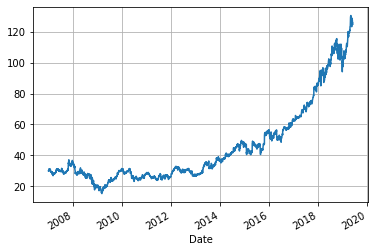

In [43]:
df_prices.loc['MSFT'][CLOSE].plot(grid=True)

By default, we use the name `SHARE_PRICE` as a synonym for the daily closing price:

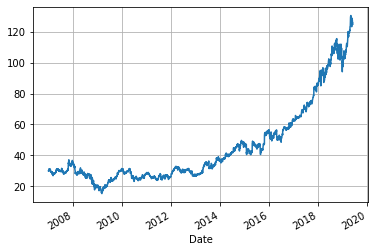

In [44]:
df_prices.loc['MSFT'][SHARE_PRICE].plot(grid=True)

We use the name `TOTAL_RETURN` as a synonym for `ADJ_CLOSE`, which is the daily closing share-price, adjusted for BOTH stock-splits AND reinvestment of dividends:

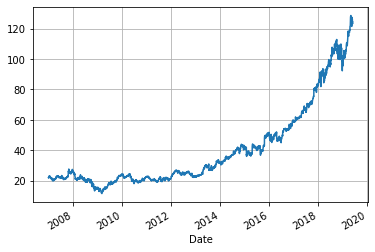

In [45]:
df_prices.loc['MSFT'][TOTAL_RETURN].plot(grid=True)

We can then compare the Share Price to the Total Return to see the effect of dividend reinvestment (assuming there are no taxes).

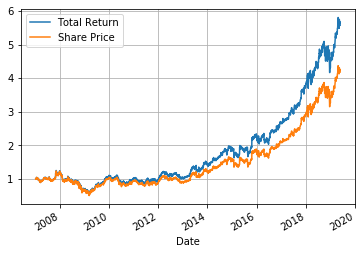

In [46]:
# Get the relevant data.
df = df_prices.loc['MSFT'][[TOTAL_RETURN, SHARE_PRICE]].copy()

# Rename the columns.
df.rename(columns={TOTAL_RETURN: 'Total Return',
                   SHARE_PRICE: 'Share Price'}, inplace=True)

# Normalize to begin at 1.0
df /= df.values[0]

# Plot it.
df.plot(grid=True)

### Load Share Price Ratios

If you have a SimFin+ subscription, you can also load the price ratios dataset. Basically this dataset contains pre-calculated daily price based ratios. To load the ratios, simply run:

In [58]:
# note: this will throw an error if you didn't specify a valid API key via sf.set_api_key or sf.load_api_key
try:
    df_price_ratios = sf.load_derived_shareprices(variant='daily', market='us')
except Exception as e:
    print(e)

Dataset "us-derived-shareprices-daily" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


You can now plot things like the daily Enterprise Value for Microsoft:

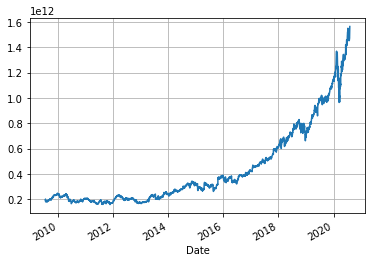

In [59]:
try:
    df_price_ratios.loc['MSFT'][EV].plot(grid=True)
except Exception as e:
    print(e)

A comprehensive list of all currently available ratios can be found [here](https://simfin.com/data/bulk?dataset=derived-shareprices&variant=daily&market=us).

### Load Company Details

The dataset for company details can also be loaded with the specialized function `sf.load_companies()`. This can either be indexed by `TICKER` (which may not be unique) or `SIMFIN_ID` (which is unique). By default it is indexed by `TICKER`.

In [47]:
df_companies = sf.load_companies(index=TICKER, market='us')

Dataset "us-companies" on disk (0 days old).
- Loading from disk ... Done!


In [48]:
df_companies.head()

,SimFinId,Company Name,IndustryId
Ticker,,,
A,45846,AGILENT TECHNOLOGIES INC,106001.0
AA,367153,Alcoa Corp,110004.0
AAC,939324,"AAC Holdings, Inc.",106011.0
AAL,68568,American Airlines Group Inc.,100006.0
AAME,450021,ATLANTIC AMERICAN CORP,104004.0


For example, we can lookup the details for the company with ticker MSFT:

In [49]:
df_companies.loc['MSFT']

SimFinId                 59265
Company Name    MICROSOFT CORP
IndustryId              101003
Name: MSFT, dtype: object

### Load Sector and Industry Details

The dataset for details of sectors and industries can also be loaded with the specialized function `sf.load_industries()`.

Note that the industries are the same for all markets, so the market-argument is not allowed in the load-function and will raise a server-exception.

In [50]:
df_industries = sf.load_industries()

Dataset "industries" on disk (0 days old).
- Loading from disk ... Done!


In [51]:
df_industries.head()

,Sector,Industry
IndustryId,,
100001,Industrials,Industrial Products
100002,Industrials,Business Services
100003,Industrials,Engineering & Construction
100004,Industrials,Waste Management
100005,Industrials,Industrial Distribution


For example, we can lookup the Industry ID associated with the MSFT stock.

In [52]:
industry_id = df_companies.loc['MSFT'][INDUSTRY_ID]
industry_id

101003.0

We can then lookup the industry and sector details for that Industry ID.

In [53]:
df_industries.loc[industry_id]

Sector                Technology
Industry    Application Software
Name: 101003, dtype: object

### Market

Many of the load-functions above can take an optional argument `market`. By default this is set to `market='us'` for loading data for USA.

For example, we can load all the annual Income Statements for the German market which is abbreviated as 'de' for Deutschland (which means Germany in the German language).

In [54]:
df_income_de = sf.load_income(variant='annual', market='de')

Dataset "de-income-annual" on disk (0 days old).
- Loading from disk ... Done!


In [55]:
df_income_de.head()

SimFinId Currency  Fiscal Year Fiscal Period  \
Ticker  Report Date                                                 
ADS.DE  2018-12-31     847329      EUR         2018            FY   
BAYN.DE 2004-12-31     849702      EUR         2004            FY   
        2005-12-31     849702      EUR         2005            FY   
        2006-12-31     849702      EUR         2006            FY   
        2007-12-31     849702      EUR         2007            FY   

                    Publish Date Restated Date  Shares (Basic)  \
Ticker  Report Date                                              
ADS.DE  2018-12-31    2019-03-16    2019-09-13             NaN   
BAYN.DE 2004-12-31    2005-06-14    2019-09-12             NaN   
        2005-12-31    2006-06-14    2019-09-12             NaN   
        2006-12-31    2007-06-14    2019-09-12             NaN   
        2007-12-31    2008-06-13    2019-09-12             NaN   

                     Shares (Diluted)      Revenue  Cost of Revenue  ...  \
Ticker  Report Date                                                  ...   
ADS.DE  2018-12-31                NaN  21915000000     -10552000000  ...   
BAYN.DE 2004-12-31                NaN  29758000000     -17382000000  ...   
        2005-12-31                NaN  24701000000     -13412000000  ...   
        2006-12-31                NaN  28956000000     -15275000000  ...   
        2007-12-31                NaN  32385000000     -16352000000  ...   

                     Non-Operating Income (Loss)  Interest Expense, Net  \
Ticker  Report Date                                                       
ADS.DE  2018-12-31                      10000000             10000000.0   
BAYN.DE 2004-12-31                    -823000000           -275000000.0   
        2005-12-31                    -602000000                    NaN   
        2006-12-31                    -782000000                    NaN   
        2007-12-31                    -920000000                    NaN   

                     Pretax Income (Loss), Adj.  Abnormal Gains (Losses)  \
Ticker  Report Date                                                        
ADS.DE  2018-12-31                   2418000000              -41000000.0   
BAYN.DE 2004-12-31                    985000000                      NaN   
        2005-12-31                   1912000000                      NaN   
        2006-12-31                   1980000000                      NaN   
        2007-12-31                   2234000000                      NaN   

                     Pretax Income (Loss)  Income Tax (Expense) Benefit, Net  \
Ticker  Report Date                                                            
ADS.DE  2018-12-31             2377000000                         -669000000   
BAYN.DE 2004-12-31              985000000                         -385000000   
        2005-12-31             1912000000                         -538000000   
        2006-12-31             1980000000                         -454000000   
        2007-12-31             2234000000                           72000000   

                     Income (Loss) from Continuing Operations  \
Ticker  Report Date                                             
ADS.DE  2018-12-31                                 1708000000   
BAYN.DE 2004-12-31                                  600000000   
        2005-12-31                                 1374000000   
        2006-12-31                                 1526000000   
        2007-12-31                                 2306000000   

                     Net Extraordinary Gains (Losses)  Net Income  \
Ticker  Report Date                                                 
ADS.DE  2018-12-31                      -5.000000e+06  1700000000   
BAYN.DE 2004-12-31                                NaN   603000000   
        2005-12-31                       2.210000e+08  1597000000   
        2006-12-31                       1.690000e+08  1683000000   
        2007-12-31                       2.410000e+

### Market Details

The function `sf.load_markets()` loads a dataset with details about the markets.

In [56]:
df_markets = sf.load_markets()

Dataset "markets" on disk (0 days old).
- Loading from disk ... Done!


In [57]:
df_markets.head()

,Market Name,Currency
MarketId,,
ca,Canada,CAD
de,Germany,EUR
it,Italy,EUR
sg,Singapore,SGD
us,United States,USD


In [58]:
df_markets.loc['us']

Market Name    United States
Currency                 USD
Name: us, dtype: object

### Market Limitations

In order to keep the API simple to use and understand, some limitations have been put on the market-designation: Companies and their stocks are only included in the datasets if they belong to the same market.

For example, the company Alibaba is Chinese so it belongs to market='cn'. We do not have the data for Chinese share-prices, but Alibaba's stock also trades in USA under the ticker BABA, and in Mexico under the ticker BABAN.MX. This is not allowed in our datasets so Alibaba is excluded.

Another example is the German company Adidas which belongs to market='de'. Its stock trades in the German stock-market under the ticker ADS (we call it ADS.DE) so it is included in the datasets for market='de'. The Adidas stock also trades on non-German markets, e.g. in USA under the ticker ADDYY, but that is not included in our datasets, because it does not match the home-market of the company.

### Market Currency

Because of the above limitations on markets, the currency is the same for all the shareprices and financial reports within a given market. For example, all shareprices and financial reports in the market 'us' are in the USD currency, and they are in the EUR currency for market 'de'.

The currency has been omitted from the dataset with shareprices, because it would be the exact same value for every single row within a market. But the currency is still included in other datasets such as 'income' for Income Statements and 'balance' for Balance Sheets, because it is standard to write the currency there.

## Server Errors

If the SimFin server returns an error, then it raises an exception named `sf.ServerException` which is a sub-class of Python's built-in `Exception` class.

For example, we can try and load a dataset from the SimFin server that requires a paid subscription and a valid API key.

In [59]:
try:
    df = sf.load_income(variant='annual-full', market='us')
except sf.ServerException as e:
    print(e)

Dataset "us-income-annual-full" not on disk.
SimFin server error: An api key is needed for premium variants, please append your api-key to the query using the 'api-key' parameter.


We can also try and load a dataset that does not exist on the SimFin server, which gives another error message.

In [60]:
try:
    df = sf.load(dataset='grays-sports-almanac')
except sf.ServerException as e:
    print(e)

Dataset "grays-sports-almanac" not on disk.
SimFin server error: The specified dataset was not found.


Many other types of exceptions can also be raised e.g. if there is no internet connection, or if there are problems with your disk, etc.

## Dataset & Column Information

There are two ways of getting information about the available datasets and columns. There is a [web-page](https://simfin.com/data/bulk) which also shows the Python code for loading the datasets. You may want to bookmark that web-page in your internet browser, as it will save you a lot of time when working with the SimFin API.

Alternatively, you may use the following functions. The first function shows all available datasets. Note how it first downloads and loads a dataset that contains the "meta-data" for all the other datasets:

In [61]:
sf.info_datasets()

Dataset "datasets" on disk (0 days old).
- Loading from disk ... Done!
All datasets: balance, balance-banks, balance-insurance, cashflow,
              cashflow-banks, cashflow-insurance, companies, income,
              income-banks, income-insurance, industries, markets, shareprices


We may also call this function with the exact name of a dataset to show its details, such as the possible variants and markets, as well as a full list of its columns:

In [62]:
sf.info_datasets('companies')

Dataset:  companies
Variants: -
Markets:  de, us
Columns:  (The * marks data that requires a paid subscription)
- "Ticker" TICKER
- "SimFinId" SIMFIN_ID
- "Company Name" COMPANY_NAME
- "IndustryId" INDUSTRY_ID


We may call another function to get details about a certain column:

In [63]:
sf.info_columns(COMPANY_NAME)

Dataset "columns" on disk (0 days old).
- Loading from disk ... Done!
Name:        "Company Name"
Shortcuts:   COMPANY_NAME
Premium:     False
Datasets:    companies
Description: Name of a company e.g. 'Microsoft'.



This function can also search all the available columns. For example, if we want to find all columns whose name, shortcuts or description contain the word 'shares':

In [64]:
sf.info_columns('shares')

Name:        "Volume"
Shortcuts:   SHARE_VOLUME, VOLUME
Premium:     False
Datasets:    shareprices
Description: Number of shares traded during the day. Adjusted for stock-splits.

Name:        "Shares (Basic)"
Shortcuts:   SHARES_BASIC
Premium:     False
Datasets:    balance, balance-banks, balance-insurance, cashflow,
             cashflow-banks, cashflow-insurance, income, income-banks,
             income-insurance
Description: Shares outstanding NOT adjusted for dilution from stock-options
             etc. Weighted average for the period. Adjusted for stock-splits.

Name:        "Shares (Diluted)"
Shortcuts:   SHARES_DILUTED
Premium:     False
Datasets:    balance, balance-banks, balance-insurance, cashflow,
             cashflow-banks, cashflow-insurance, income, income-banks,
             income-insurance
Description: Shares outstanding adjusted for dilution from stock-options etc.
             Weighted average for the period. Adjusted for stock-splits.



## Pandas Introduction

This section is intended to help people who are new to Pandas. Some aspects of Pandas are awkward and inconsistent, but Pandas is the standard library for manipulating tabular and time-series data in Python, so it is important to know how it works.

In this demonstration, we will use a subset of the annual Income Statements from the SimFin database for only 3 stocks: AAPL, AMZN and MSFT.

In [65]:
df_income = sf.load_income(variant='annual', market='us')
tickers = ['AAPL', 'AMZN', 'MSFT']
df = df_income.loc[tickers]

Dataset "us-income-annual" on disk (0 days old).
- Loading from disk ... Done!


We usually call `df.head()` to only show the first 5 rows of the Pandas DataFrame:

In [66]:
df.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
AAPL   2008-09-30     111052      USD         2008            FY   2008-10-22   
       2009-09-30     111052      USD         2009            FY   2009-10-21   
       2010-09-30     111052      USD         2010            FY   2010-10-27   
       2011-09-30     111052      USD         2011            FY   2011-10-26   
       2012-09-30     111052      USD         2012            FY   2012-10-31   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
AAPL   2008-09-30     2010-10-27    6.171144e+09      6.314973e+09   
       2009-09-30     2011-10-26    6.251112e+09      6.349035e+09   
       2010-09-30     2012-10-31    6.366227e+09      6.472984e+09   
       2011-09-30     2013-10-30    6.469806e+09      6.556515e+09   
       2012-09-30     2014-10-27    6.543726e+09      6.617483e+09   

                         Revenue  Cost of Revenue  ...  \
Ticker Report Date                                 ...   
AAPL   2008-09-30   3.749100e+10    -2.429400e+10  ...   
       2009-09-30   4.290500e+10    -2.568300e+10  ...   
       2010-09-30   6.522500e+10    -3.954100e+10  ...   
       2011-09-30   1.082490e+11    -6.443100e+10  ...   
       2012-09-30   1.565080e+11    -8.784600e+10  ...   

                    Non-Operating Income (Loss)  Interest Expense, Net  \
Ticker Report Date                                                       
AAPL   2008-09-30                   620000000.0                    NaN   
       2009-09-30                   326000000.0                    NaN   
       2010-09-30                   155000000.0                    NaN   
       2011-09-30                   415000000.0                    NaN   
       2012-09-30                   522000000.0                    NaN   

                    Pretax Income (Loss), Adj.  Abnormal Gains (Losses)  \
Ticker Report Date                                                        
AAPL   2008-09-30                   8947000000                      NaN   
       2009-09-30                  12066000000                      NaN   
       2010-09-30                  18540000000                      NaN   
       2011-09-30                  34205000000                      NaN   
       2012-09-30                  55763000000                      NaN   

                    Pretax Income (Loss)  Income Tax (Expense) Benefit, Net  \
Ticker Report Date                                                            
AAPL   2008-09-30             8947000000                      -2.828000e+09   
       2009-09-30            12066000000                      -3.831000e+09   
       2010-09-30            18540000000                      -4.527000e+09   
       2011-09-30            34205000000                      -8.283000e+09   
       2012-09-30            55763000000                      -1.403000e+10   

                    Income (Loss) from Continuing Operations  \
Ticker Report Date                                             
AAPL   2008-09-30                                 6119000000   
       2009-09-30                                 8235000000   
       2010-09-30                                14013000000   
       2011-09-30                                25922000000   
       2012-09-30                                41733000000   

                    Net Extraordinary Gains (Losses)   Net Income  \
Ticker Report Date                                                  
AAPL   2008-09-30                                NaN   6119000000   
       2009-09-30                                NaN   8235000000   
       2010-09-30                                NaN  14013000000   
       2011-09-30                                NaN  25922000000   
       2012-09-30                                NaN  41733000000   

                    Ne

### Select Columns

A Pandas DataFrame is a 2-dimensional tabular data-structure, which can be indexed by row- and column-labels. The following operation selects the column with the label `REVENUE`, which is a short-cut for the string `'Revenue'` (as explained above, these short-cuts are particularly useful for longer labels such as 'Selling, General & Administrative' whose short-cut is `SGA`):

In [67]:
df[REVENUE].head()

Ticker  Report Date
AAPL    2008-09-30     3.749100e+10
        2009-09-30     4.290500e+10
        2010-09-30     6.522500e+10
        2011-09-30     1.082490e+11
        2012-09-30     1.565080e+11
Name: Revenue, dtype: float64

Because we only requested the single column `REVENUE` from the DataFrame `df`, the above returned a Pandas Series which is a 1-dimensional array-like data-structure.

Sometimes it is useful to create a new Pandas DataFrame from a column-lookup, even though it only contains a single column, because it makes it easier to add new columns to the resulting DataFrame. We do this by selecting a *list* of columns such as `[REVENUE]`, even though it only contains a single label `REVENUE`. Note the double-brackets:

In [68]:
df[[REVENUE]].head()

Revenue
Ticker Report Date              
AAPL   2008-09-30   3.749100e+10
       2009-09-30   4.290500e+10
       2010-09-30   6.522500e+10
       2011-09-30   1.082490e+11
       2012-09-30   1.565080e+11

We can also select a list of different columns:

In [69]:
df[[REVENUE, NET_INCOME]].head()

Revenue   Net Income
Ticker Report Date                           
AAPL   2008-09-30   3.749100e+10   6119000000
       2009-09-30   4.290500e+10   8235000000
       2010-09-30   6.522500e+10  14013000000
       2011-09-30   1.082490e+11  25922000000
       2012-09-30   1.565080e+11  41733000000

### Select Rows

We can use `df.loc[key]` to lookup a row from the DataFrame `df` with the given `key`. But our DataFrame `df` is indexed by both Ticker and Report Date (or `TICKER` and `REPORT_DATE`). This is called a MultiIndex in Pandas. If we only provide a single key to `df.loc[]`, then it is assumed to be the first index, which is Ticker in this case. So we can lookup the rows where the Ticker is MSFT:

In [70]:
df.loc['MSFT'].head()

,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
Report Date,,,,,,,,,,,,,,,,,,,,,
2009-06-30,59265,USD,2009,FY,2009-07-22,2011-07-28,8.945000e+09,8.996000e+09,5.843700e+10,-1.215500e+10,...,-542000000.0,NaN,19821000000,NaN,19821000000,-5.252000e+09,14569000000,NaN,14569000000,14569000000
2010-06-30,59265,USD,2010,FY,2010-07-30,2012-07-26,8.813000e+09,8.927000e+09,6.248400e+10,-1.239500e+10,...,915000000.0,NaN,25013000000,0.000000e+00,25013000000,-6.253000e+09,18760000000,NaN,18760000000,18760000000
2011-06-30,59265,USD,2011,FY,2011-07-28,2013-07-30,8.490000e+09,8.593000e+09,6.994300e+10,-1.557700e+10,...,910000000.0,NaN,28071000000,0.000000e+00,28071000000,-4.921000e+09,23150000000,NaN,23150000000,23150000000
2012-06-30,59265,USD,2012,FY,2012-07-26,2014-07-31,8.396000e+09,8.506000e+09,7.372300e+10,-1.753000e+10,...,504000000.0,NaN,28460000000,-6.193000e+09,22267000000,-5.289000e+09,16978000000,NaN,16978000000,16978000000
2013-06-30,59265,USD,2013,FY,2013-07-30,2015-07-31,8.375000e+09,8.470000e+09,7.784900e+10,-2.038500e+10,...,288000000.0,NaN,27052000000,0.000000e+00,27052000000,-5.189000e+09,21863000000,NaN,21863000000,21863000000


We can also specify both the Ticker and Report Date we are interested in. If there is a matching row in the DataFrame, then it returns a Pandas Series with the contents of the given row, otherwise it raises an exception.

In [71]:
df.loc['MSFT', '2010-06-30']

SimFinId                                                  59265
Currency                                                    USD
Fiscal Year                                                2010
Fiscal Period                                                FY
Publish Date                                2010-07-30 00:00:00
Restated Date                               2012-07-26 00:00:00
Shares (Basic)                                        8.813e+09
Shares (Diluted)                                      8.927e+09
Revenue                                              6.2484e+10
Cost of Revenue                                     -1.2395e+10
Gross Profit                                         5.0089e+10
Operating Expenses                                  -2.5991e+10
Selling, General & Administrative                   -1.7277e+10
Research & Development                               -8.714e+09
Depreciation & Amortization                                 NaN
Operating Income (Loss)                 

However, the above syntax for looking up a row using two keys is ambiguous with the row/column lookup shown below. So it is better to explicitly write the two keys as a tuple:

In [72]:
df.loc[('MSFT', '2010-06-30')]

SimFinId                                                  59265
Currency                                                    USD
Fiscal Year                                                2010
Fiscal Period                                                FY
Publish Date                                2010-07-30 00:00:00
Restated Date                               2012-07-26 00:00:00
Shares (Basic)                                        8.813e+09
Shares (Diluted)                                      8.927e+09
Revenue                                              6.2484e+10
Cost of Revenue                                     -1.2395e+10
Gross Profit                                         5.0089e+10
Operating Expenses                                  -2.5991e+10
Selling, General & Administrative                   -1.7277e+10
Research & Development                               -8.714e+09
Depreciation & Amortization                                 NaN
Operating Income (Loss)                 

### Select Columns and Rows

In these tutorials, we often use the following syntax for selecting the row with key `'MSFT'` and columns with keys `[REVENUE, NET_INCOME]`, because I personally find this easier to read:

In [73]:
df.loc['MSFT'][[REVENUE, NET_INCOME]].head()

,Revenue,Net Income
Report Date,,
2009-06-30,5.843700e+10,14569000000
2010-06-30,6.248400e+10,18760000000
2011-06-30,6.994300e+10,23150000000
2012-06-30,7.372300e+10,16978000000
2013-06-30,7.784900e+10,21863000000


But this actually performs two lookup operations. First it performs `df.loc['MSFT']` which creates a temporary DataFrame, on which the secondary lookup operation is perfomed for getting the list of columns `[REVENUE, NET_INCOME]`. We can do all this in a single operation using a single call to `df.loc[]` with the following syntax:

In [74]:
df.loc['MSFT', [REVENUE, NET_INCOME]].head()

,Revenue,Net Income
Report Date,,
2009-06-30,5.843700e+10,14569000000
2010-06-30,6.248400e+10,18760000000
2011-06-30,6.994300e+10,23150000000
2012-06-30,7.372300e+10,16978000000
2013-06-30,7.784900e+10,21863000000


We can also use this syntax to select a specific row and some columns:

In [75]:
df.loc[('MSFT', '2010-06-30'), [REVENUE, NET_INCOME]]

,,Revenue,Net Income
Ticker,Report Date,,
MSFT,2010-06-30,6.248400e+10,18760000000


### Timing

There are two main reasons for using a single `df.loc[]` operation instead of chained lookup. The first reason is due to performance, as it is supposed to be faster to use a single lookup operation, instead of two chained lookup operations. But as we can see from these `timeit` experiments, the performance difference may be tiny, and in some cases it is actually slightly faster when using chained lookup operations.

In [76]:
%%timeit
# Two chained lookup operations
df_income.loc[tickers][[REVENUE, NET_INCOME]]

1.85 ms ± 312 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [77]:
%%timeit
# One single lookup operation.
df_income.loc[tickers, [REVENUE, NET_INCOME]]

1.81 ms ± 28.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


The second reason for using a single lookup operation instead of chained lookup, is discussed further below and has to do with unexpected results from chained assignments.

### Slicing

We can select the rows from a DataFrame between two indices, which is also known as a slice. There are several ways of doing this.

First we can use the `df[]` operator which is normally used for column-selection, but somewhat confusingly changes behaviour to row-slicing when the argument is of the form `start_index:end_index`. 

For example, we can select all rows between the start-index `('MSFT', '2010-06-30')` and the end-index `('MSFT', '2013-06-30')`. Both these indices must be present in the DataFrame or the operation will raise an exception. The resulting DataFrame includes both these end-points:

In [78]:
df[('MSFT', '2010-06-30'):('MSFT', '2013-06-30')]

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
MSFT   2010-06-30      59265      USD         2010            FY   2010-07-30   
       2011-06-30      59265      USD         2011            FY   2011-07-28   
       2012-06-30      59265      USD         2012            FY   2012-07-26   
       2013-06-30      59265      USD         2013            FY   2013-07-30   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
MSFT   2010-06-30     2012-07-26    8.813000e+09      8.927000e+09   
       2011-06-30     2013-07-30    8.490000e+09      8.593000e+09   
       2012-06-30     2014-07-31    8.396000e+09      8.506000e+09   
       2013-06-30     2015-07-31    8.375000e+09      8.470000e+09   

                         Revenue  Cost of Revenue  ...  \
Ticker Report Date                                 ...   
MSFT   2010-06-30   6.248400e+10    -1.239500e+10  ...   
       2011-06-30   6.994300e+10    -1.557700e+10  ...   
       2012-06-30   7.372300e+10    -1.753000e+10  ...   
       2013-06-30   7.784900e+10    -2.038500e+10  ...   

                    Non-Operating Income (Loss)  Interest Expense, Net  \
Ticker Report Date                                                       
MSFT   2010-06-30                   915000000.0                    NaN   
       2011-06-30                   910000000.0                    NaN   
       2012-06-30                   504000000.0                    NaN   
       2013-06-30                   288000000.0                    NaN   

                    Pretax Income (Loss), Adj.  Abnormal Gains (Losses)  \
Ticker Report Date                                                        
MSFT   2010-06-30                  25013000000             0.000000e+00   
       2011-06-30                  28071000000             0.000000e+00   
       2012-06-30                  28460000000            -6.193000e+09   
       2013-06-30                  27052000000             0.000000e+00   

                    Pretax Income (Loss)  Income Tax (Expense) Benefit, Net  \
Ticker Report Date                                                            
MSFT   2010-06-30            25013000000                      -6.253000e+09   
       2011-06-30            28071000000                      -4.921000e+09   
       2012-06-30            22267000000                      -5.289000e+09   
       2013-06-30            27052000000                      -5.189000e+09   

                    Income (Loss) from Continuing Operations  \
Ticker Report Date                                             
MSFT   2010-06-30                                18760000000   
       2011-06-30                                23150000000   
       2012-06-30                                16978000000   
       2013-06-30                                21863000000   

                    Net Extraordinary Gains (Losses)   Net Income  \
Ticker Report Date                                                  
MSFT   2010-06-30                                NaN  18760000000   
       2011-06-30                                NaN  23150000000   
       2012-06-30                                NaN  16978000000   
       2013-06-30                                NaN  21863000000   

                    Net Income (Common)  
Ticker Report Date                       
MSFT   2010-06-30           18760000000  
       2011-06-30           23150000000  
       2012-06-30           16978000000  
       2013-06-30           21863000000  

[4 rows x 26 columns]

The exact same slice can be extracted using the `df.loc[]` operator instead of `df[]`:

In [79]:
df.loc[('MSFT', '2010-06-30'):('MSFT', '2013-06-30')]

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
MSFT   2010-06-30      59265      USD         2010            FY   2010-07-30   
       2011-06-30      59265      USD         2011            FY   2011-07-28   
       2012-06-30      59265      USD         2012            FY   2012-07-26   
       2013-06-30      59265      USD         2013            FY   2013-07-30   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
MSFT   2010-06-30     2012-07-26    8.813000e+09      8.927000e+09   
       2011-06-30     2013-07-30    8.490000e+09      8.593000e+09   
       2012-06-30     2014-07-31    8.396000e+09      8.506000e+09   
       2013-06-30     2015-07-31    8.375000e+09      8.470000e+09   

                         Revenue  Cost of Revenue  ...  \
Ticker Report Date                                 ...   
MSFT   2010-06-30   6.248400e+10    -1.239500e+10  ...   
       2011-06-30   6.994300e+10    -1.557700e+10  ...   
       2012-06-30   7.372300e+10    -1.753000e+10  ...   
       2013-06-30   7.784900e+10    -2.038500e+10  ...   

                    Non-Operating Income (Loss)  Interest Expense, Net  \
Ticker Report Date                                                       
MSFT   2010-06-30                   915000000.0                    NaN   
       2011-06-30                   910000000.0                    NaN   
       2012-06-30                   504000000.0                    NaN   
       2013-06-30                   288000000.0                    NaN   

                    Pretax Income (Loss), Adj.  Abnormal Gains (Losses)  \
Ticker Report Date                                                        
MSFT   2010-06-30                  25013000000             0.000000e+00   
       2011-06-30                  28071000000             0.000000e+00   
       2012-06-30                  28460000000            -6.193000e+09   
       2013-06-30                  27052000000             0.000000e+00   

                    Pretax Income (Loss)  Income Tax (Expense) Benefit, Net  \
Ticker Report Date                                                            
MSFT   2010-06-30            25013000000                      -6.253000e+09   
       2011-06-30            28071000000                      -4.921000e+09   
       2012-06-30            22267000000                      -5.289000e+09   
       2013-06-30            27052000000                      -5.189000e+09   

                    Income (Loss) from Continuing Operations  \
Ticker Report Date                                             
MSFT   2010-06-30                                18760000000   
       2011-06-30                                23150000000   
       2012-06-30                                16978000000   
       2013-06-30                                21863000000   

                    Net Extraordinary Gains (Losses)   Net Income  \
Ticker Report Date                                                  
MSFT   2010-06-30                                NaN  18760000000   
       2011-06-30                                NaN  23150000000   
       2012-06-30                                NaN  16978000000   
       2013-06-30                                NaN  21863000000   

                    Net Income (Common)  
Ticker Report Date                       
MSFT   2010-06-30           18760000000  
       2011-06-30           23150000000  
       2012-06-30           16978000000  
       2013-06-30           21863000000  

[4 rows x 26 columns]

We can slice both the rows and columns using `df.loc[]`. For example, we can take the same rows as above, but only take the columns between `REVENUE` and `OP_EXP`:

In [80]:
df.loc[('MSFT', '2010-06-30'):('MSFT', '2013-06-30'),
       REVENUE:OP_EXP].head()

Revenue  Cost of Revenue  Gross Profit  \
Ticker Report Date                                                
MSFT   2010-06-30   6.248400e+10    -1.239500e+10  5.008900e+10   
       2011-06-30   6.994300e+10    -1.557700e+10  5.436600e+10   
       2012-06-30   7.372300e+10    -1.753000e+10  5.619300e+10   
       2013-06-30   7.784900e+10    -2.038500e+10  5.746400e+10   

                    Operating Expenses  
Ticker Report Date                      
MSFT   2010-06-30        -2.599100e+10  
       2011-06-30        -2.720500e+10  
       2012-06-30        -2.823700e+10  
       2013-06-30        -3.070000e+10

If we are doing chained lookup operations, we can use more flexible slicing syntax, because we are working on a Pandas DataFrame with a single index for the Report Date, instead of a MultiIndex with both the Ticker and Report Date, so Pandas allows more flexible slicing operations.

For example, we can select the rows where the Ticker is 'MSFT' using `df.loc['MSFT']`, and then slice the resulting DataFrame to select the rows where Report Date is between 2010 and 2013 (both inclusive):

In [81]:
df.loc['MSFT']['2010':'2013']

,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
Report Date,,,,,,,,,,,,,,,,,,,,,
2010-06-30,59265,USD,2010,FY,2010-07-30,2012-07-26,8.813000e+09,8.927000e+09,6.248400e+10,-1.239500e+10,...,915000000.0,NaN,25013000000,0.000000e+00,25013000000,-6.253000e+09,18760000000,NaN,18760000000,18760000000
2011-06-30,59265,USD,2011,FY,2011-07-28,2013-07-30,8.490000e+09,8.593000e+09,6.994300e+10,-1.557700e+10,...,910000000.0,NaN,28071000000,0.000000e+00,28071000000,-4.921000e+09,23150000000,NaN,23150000000,23150000000
2012-06-30,59265,USD,2012,FY,2012-07-26,2014-07-31,8.396000e+09,8.506000e+09,7.372300e+10,-1.753000e+10,...,504000000.0,NaN,28460000000,-6.193000e+09,22267000000,-5.289000e+09,16978000000,NaN,16978000000,16978000000
2013-06-30,59265,USD,2013,FY,2013-07-30,2015-07-31,8.375000e+09,8.470000e+09,7.784900e+10,-2.038500e+10,...,288000000.0,NaN,27052000000,0.000000e+00,27052000000,-5.189000e+09,21863000000,NaN,21863000000,21863000000


Another example is for the Share-Prices dataset. Let us first select the rows where Ticker is 'MSFT', and from those rows we select the slice where the Date is between '2010-01' and '2010-01-10'. Because the DataFrame only has a single index which is a date, Pandas can do more advanced pattern-matching and select all dates between these end-points, even though '2010-01' is only partially defined. Also note that the end-points don't need to exist in the DataFrame, as would be required when using `df.loc[]` for the slicing.

In [82]:
df_prices.loc['MSFT']['2010-01':'2010-01-10']

,SimFinId,Open,Low,High,Close,Adj. Close,Dividend,Volume
Date,,,,,,,,
2010-01-04,59265,30.62,30.59,31.10,30.950,24.23,NaN,38409100
2010-01-05,59265,30.85,30.64,31.10,30.960,24.24,NaN,49749600
2010-01-06,59265,30.88,30.52,31.08,30.770,24.09,NaN,58182400
2010-01-07,59265,30.63,30.19,30.70,30.452,23.84,NaN,50559700
2010-01-08,59265,30.28,30.24,30.88,30.660,24.00,NaN,51197400


### Masked Lookup

Another common technique for selecting particular rows from a DataFrame is so-called masked lookup. The idea is to create a Pandas Series with a boolean for each row in the original DataFrame, which indicates whether we are interested in that row or not.

For example, say we want to select the rows where the Revenue is greater than 2e11, so we first create a boolean mask indicating which rows satisfy this condition:

In [83]:
mask1 = (df[REVENUE] > 2e11)
mask1

Ticker  Report Date
AAPL    2008-09-30     False
        2009-09-30     False
        2010-09-30     False
        2011-09-30     False
        2012-09-30     False
        2013-09-30     False
        2014-09-30     False
        2015-09-30      True
        2016-09-30      True
        2017-09-30      True
        2018-09-30      True
AMZN    2008-12-31     False
        2009-12-31     False
        2010-12-31     False
        2011-12-31     False
        2012-12-31     False
        2013-12-31     False
        2014-12-31     False
        2015-12-31     False
        2016-12-31     False
        2017-12-31     False
        2018-12-31      True
MSFT    2009-06-30     False
        2010-06-30     False
        2011-06-30     False
        2012-06-30     False
        2013-06-30     False
        2014-06-30     False
        2015-06-30     False
        2016-06-30     False
        2017-06-30     False
        2018-06-30     False
Name: Revenue, dtype: bool

Then we can use the boolean mask to select the desired rows from the original DataFrame:

In [84]:
df[mask1]

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
AAPL   2015-09-30     111052      USD         2015            FY   2015-10-28   
       2016-09-30     111052      USD         2016            FY   2016-10-26   
       2017-09-30     111052      USD         2017            FY   2017-11-02   
       2018-09-30     111052      USD         2018            FY   2018-11-05   
AMZN   2018-12-31      62747      USD         2018            FY   2019-02-01   

                   Restated Date  Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                                   
AAPL   2015-09-30     2017-11-03    5.753421e+09      5.793069e+09   
       2016-09-30     2018-11-05    5.470820e+09      5.500281e+09   
       2017-09-30     2018-11-05    5.217242e+09      5.251692e+09   
       2018-09-30     2018-11-05    4.955377e+09      5.000109e+09   
AMZN   2018-12-31     2019-02-01    4.870000e+08      5.000000e+08   

                         Revenue  Cost of Revenue  ...  \
Ticker Report Date                                 ...   
AAPL   2015-09-30   2.337150e+11    -1.400890e+11  ...   
       2016-09-30   2.156390e+11    -1.313760e+11  ...   
       2017-09-30   2.292340e+11    -1.410480e+11  ...   
       2018-09-30   2.655950e+11    -1.637560e+11  ...   
AMZN   2018-12-31   2.328870e+11    -1.391560e+11  ...   

                    Non-Operating Income (Loss)  Interest Expense, Net  \
Ticker Report Date                                                       
AAPL   2015-09-30                  1.285000e+09                    NaN   
       2016-09-30                  1.348000e+09                    NaN   
       2017-09-30                  2.745000e+09                    NaN   
       2018-09-30                  2.005000e+09                    NaN   
AMZN   2018-12-31                 -1.160000e+09           -977000000.0   

                    Pretax Income (Loss), Adj.  Abnormal Gains (Losses)  \
Ticker Report Date                                                        
AAPL   2015-09-30                  72515000000                      NaN   
       2016-09-30                  61372000000                      NaN   
       2017-09-30                  64089000000                      NaN   
       2018-09-30                  72903000000                      NaN   
AMZN   2018-12-31                  11261000000                      NaN   

                    Pretax Income (Loss)  Income Tax (Expense) Benefit, Net  \
Ticker Report Date                                                            
AAPL   2015-09-30            72515000000                      -1.912100e+10   
       2016-09-30            61372000000                      -1.568500e+10   
       2017-09-30            64089000000                      -1.573800e+10   
       2018-09-30            72903000000                      -1.337200e+10   
AMZN   2018-12-31            11261000000                      -1.197000e+09   

                    Income (Loss) from Continuing Operations  \
Ticker Report Date                                             
AAPL   2015-09-30                                53394000000   
       2016-09-30                                45687000000   
       2017-09-30                                48351000000   
       2018-09-30                                59531000000   
AMZN   2018-12-31                                10073000000   

                    Net Extraordinary Gains (Losses)   Net Income  \
Ticker Report Date                                                  
AAPL   2015-09-30                                NaN  53394000000   
       2016-09-30                                NaN  45687000000   
       2017-09-30                                NaN  48351000000   
       2018-09-30                                NaN  59531000000   
AMZN   2018-12-31                                NaN  10073000000   

                    Ne

Let us create another boolean mask for the rows where the Net Income is greater than 5e10:

In [85]:
mask2 = (df[NET_INCOME] > 5e10)
mask2

Ticker  Report Date
AAPL    2008-09-30     False
        2009-09-30     False
        2010-09-30     False
        2011-09-30     False
        2012-09-30     False
        2013-09-30     False
        2014-09-30     False
        2015-09-30      True
        2016-09-30     False
        2017-09-30     False
        2018-09-30      True
AMZN    2008-12-31     False
        2009-12-31     False
        2010-12-31     False
        2011-12-31     False
        2012-12-31     False
        2013-12-31     False
        2014-12-31     False
        2015-12-31     False
        2016-12-31     False
        2017-12-31     False
        2018-12-31     False
MSFT    2009-06-30     False
        2010-06-30     False
        2011-06-30     False
        2012-06-30     False
        2013-06-30     False
        2014-06-30     False
        2015-06-30     False
        2016-06-30     False
        2017-06-30     False
        2018-06-30     False
Name: Net Income, dtype: bool

We can then combine the two boolean masks using logical operators such as and &, or |, not ~, etc. For example, if we want to select the rows that satisfy the conditions for both boolean masks, we simply and & the masks. We then do a chained-lookup to only get the columns with Revenue and Net Income:

In [86]:
df[mask1 & mask2][[REVENUE, NET_INCOME]]

Revenue   Net Income
Ticker Report Date                           
AAPL   2015-09-30   2.337150e+11  53394000000
       2018-09-30   2.655950e+11  59531000000

Instead of using chained lookup to select these rows and columns, this could also be done using a single call of the `df.loc[]` operator:

In [87]:
df.loc[mask1 & mask2, [REVENUE, NET_INCOME]]

Revenue   Net Income
Ticker Report Date                           
AAPL   2015-09-30   2.337150e+11  53394000000
       2018-09-30   2.655950e+11  59531000000

### Assignment

There are several ways of assigning values to rows and columns of a DataFrame. For example, we can assign the value 123 to the entire Revenue column, while leaving all other columns as they were:

In [88]:
# Copy the original DataFrame so we don't change it.
df2 = df.copy()

# Set the value for a single column.
df2[REVENUE] = 123

# Show the DataFrame.
df2.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
AAPL   2008-09-30     111052      USD         2008            FY   2008-10-22   
       2009-09-30     111052      USD         2009            FY   2009-10-21   
       2010-09-30     111052      USD         2010            FY   2010-10-27   
       2011-09-30     111052      USD         2011            FY   2011-10-26   
       2012-09-30     111052      USD         2012            FY   2012-10-31   

                   Restated Date  Shares (Basic)  Shares (Diluted)  Revenue  \
Ticker Report Date                                                            
AAPL   2008-09-30     2010-10-27    6.171144e+09      6.314973e+09      123   
       2009-09-30     2011-10-26    6.251112e+09      6.349035e+09      123   
       2010-09-30     2012-10-31    6.366227e+09      6.472984e+09      123   
       2011-09-30     2013-10-30    6.469806e+09      6.556515e+09      123   
       2012-09-30     2014-10-27    6.543726e+09      6.617483e+09      123   

                    Cost of Revenue  ...  Non-Operating Income (Loss)  \
Ticker Report Date                   ...                                
AAPL   2008-09-30     -2.429400e+10  ...                  620000000.0   
       2009-09-30     -2.568300e+10  ...                  326000000.0   
       2010-09-30     -3.954100e+10  ...                  155000000.0   
       2011-09-30     -6.443100e+10  ...                  415000000.0   
       2012-09-30     -8.784600e+10  ...                  522000000.0   

                    Interest Expense, Net  Pretax Income (Loss), Adj.  \
Ticker Report Date                                                      
AAPL   2008-09-30                     NaN                  8947000000   
       2009-09-30                     NaN                 12066000000   
       2010-09-30                     NaN                 18540000000   
       2011-09-30                     NaN                 34205000000   
       2012-09-30                     NaN                 55763000000   

                    Abnormal Gains (Losses)  Pretax Income (Loss)  \
Ticker Report Date                                                  
AAPL   2008-09-30                       NaN            8947000000   
       2009-09-30                       NaN           12066000000   
       2010-09-30                       NaN           18540000000   
       2011-09-30                       NaN           34205000000   
       2012-09-30                       NaN           55763000000   

                    Income Tax (Expense) Benefit, Net  \
Ticker Report Date                                      
AAPL   2008-09-30                       -2.828000e+09   
       2009-09-30                       -3.831000e+09   
       2010-09-30                       -4.527000e+09   
       2011-09-30                       -8.283000e+09   
       2012-09-30                       -1.403000e+10   

                    Income (Loss) from Continuing Operations  \
Ticker Report Date                                             
AAPL   2008-09-30                                 6119000000   
       2009-09-30                                 8235000000   
       2010-09-30                                14013000000   
       2011-09-30                                25922000000   
       2012-09-30                                41733000000   

                    Net Extraordinary Gains (Losses)   Net Income  \
Ticker Report Date                                                  
AAPL   2008-09-30                                NaN   6119000000   
       2009-09-30                                NaN   8235000000   
       2010-09-30                                NaN  14013000000   
       2011-09-30                                NaN  25922000000   
       2012-09-30                                NaN  41733000000   

                    Net Income (Common)  
Ticker Report D

We can also do mathematical operations on the data. For example, we can divide the entire Revenue column by 1e9 to get the numbers in billions, while leaving all other columns as they were:

In [89]:
df2 = df.copy()
df2[REVENUE] /= 1e9
df2.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
AAPL   2008-09-30     111052      USD         2008            FY   2008-10-22   
       2009-09-30     111052      USD         2009            FY   2009-10-21   
       2010-09-30     111052      USD         2010            FY   2010-10-27   
       2011-09-30     111052      USD         2011            FY   2011-10-26   
       2012-09-30     111052      USD         2012            FY   2012-10-31   

                   Restated Date  Shares (Basic)  Shares (Diluted)  Revenue  \
Ticker Report Date                                                            
AAPL   2008-09-30     2010-10-27    6.171144e+09      6.314973e+09   37.491   
       2009-09-30     2011-10-26    6.251112e+09      6.349035e+09   42.905   
       2010-09-30     2012-10-31    6.366227e+09      6.472984e+09   65.225   
       2011-09-30     2013-10-30    6.469806e+09      6.556515e+09  108.249   
       2012-09-30     2014-10-27    6.543726e+09      6.617483e+09  156.508   

                    Cost of Revenue  ...  Non-Operating Income (Loss)  \
Ticker Report Date                   ...                                
AAPL   2008-09-30     -2.429400e+10  ...                  620000000.0   
       2009-09-30     -2.568300e+10  ...                  326000000.0   
       2010-09-30     -3.954100e+10  ...                  155000000.0   
       2011-09-30     -6.443100e+10  ...                  415000000.0   
       2012-09-30     -8.784600e+10  ...                  522000000.0   

                    Interest Expense, Net  Pretax Income (Loss), Adj.  \
Ticker Report Date                                                      
AAPL   2008-09-30                     NaN                  8947000000   
       2009-09-30                     NaN                 12066000000   
       2010-09-30                     NaN                 18540000000   
       2011-09-30                     NaN                 34205000000   
       2012-09-30                     NaN                 55763000000   

                    Abnormal Gains (Losses)  Pretax Income (Loss)  \
Ticker Report Date                                                  
AAPL   2008-09-30                       NaN            8947000000   
       2009-09-30                       NaN           12066000000   
       2010-09-30                       NaN           18540000000   
       2011-09-30                       NaN           34205000000   
       2012-09-30                       NaN           55763000000   

                    Income Tax (Expense) Benefit, Net  \
Ticker Report Date                                      
AAPL   2008-09-30                       -2.828000e+09   
       2009-09-30                       -3.831000e+09   
       2010-09-30                       -4.527000e+09   
       2011-09-30                       -8.283000e+09   
       2012-09-30                       -1.403000e+10   

                    Income (Loss) from Continuing Operations  \
Ticker Report Date                                             
AAPL   2008-09-30                                 6119000000   
       2009-09-30                                 8235000000   
       2010-09-30                                14013000000   
       2011-09-30                                25922000000   
       2012-09-30                                41733000000   

                    Net Extraordinary Gains (Losses)   Net Income  \
Ticker Report Date                                                  
AAPL   2008-09-30                                NaN   6119000000   
       2009-09-30                                NaN   8235000000   
       2010-09-30                                NaN  14013000000   
       2011-09-30                                NaN  25922000000   
       2012-09-30                                NaN  41733000000   

                    Net Income (Common)  
Ticker Report D

We can also use the data from other columns. For example, we can copy the column with Net Income to the column with Revenue. This doesn't make any sense in finance, of course, but is just for demonstration purposes. This could be arbitrary mathematical expressions involving other columns.

In [90]:
df2 = df.copy()
df2[REVENUE] = df[NET_INCOME]
df2[[REVENUE, NET_INCOME]].head()

Revenue   Net Income
Ticker Report Date                          
AAPL   2008-09-30    6119000000   6119000000
       2009-09-30    8235000000   8235000000
       2010-09-30   14013000000  14013000000
       2011-09-30   25922000000  25922000000
       2012-09-30   41733000000  41733000000

We can also update the data for multiple columns in a single operation. For example, we can divide both Revenue and Net Income with 1e9 to get the numbers in billions, while leaving all other columns as they were:

In [91]:
df2 = df.copy()
df2[[REVENUE, NET_INCOME]] /= 1e9
df2[[REVENUE, NET_INCOME]].head()

Revenue  Net Income
Ticker Report Date                     
AAPL   2008-09-30    37.491       6.119
       2009-09-30    42.905       8.235
       2010-09-30    65.225      14.013
       2011-09-30   108.249      25.922
       2012-09-30   156.508      41.733

We can also use the `df.loc[]` operator to select both rows and columns to update. For example, we can reuse the boolean mask from above, which selects rows where the Revenue is greater than 2e11, and for those rows we set the Revenue and Net Income to the value 123:

In [92]:
# Copy the original DataFrame so we don't change it.
df2 = df.copy()

# Boolean mask.
mask1 = (df[REVENUE] > 2e11)

# Set the values.
df2.loc[mask1, [REVENUE, NET_INCOME]] = 123

# Show those columns.
df2[[REVENUE, NET_INCOME]]

Revenue   Net Income
Ticker Report Date                           
AAPL   2008-09-30   3.749100e+10   6119000000
       2009-09-30   4.290500e+10   8235000000
       2010-09-30   6.522500e+10  14013000000
       2011-09-30   1.082490e+11  25922000000
       2012-09-30   1.565080e+11  41733000000
       2013-09-30   1.709100e+11  37037000000
       2014-09-30   1.827950e+11  39510000000
       2015-09-30   1.230000e+02          123
       2016-09-30   1.230000e+02          123
       2017-09-30   1.230000e+02          123
       2018-09-30   1.230000e+02          123
AMZN   2008-12-31   1.916600e+10    645000000
       2009-12-31   2.450900e+10    902000000
       2010-12-31   3.420400e+10   1152000000
       2011-12-31   4.807700e+10    631000000
       2012-12-31   6.109300e+10    -39000000
       2013-12-31   7.445200e+10    274000000
       2014-12-31   8.898800e+10   -241000000
       2015-12-31   1.070060e+11    596000000
       2016-12-31   1.359870e+11   2371000000
       2017-12-31   1.778660e+11   3033000000
       2018-12-31   1.230000e+02          123
MSFT   2009-06-30   5.843700e+10  14569000000
       2010-06-30   6.248400e+10  18760000000
       2011-06-30   6.994300e+10  23150000000
       2012-06-30   7.372300e+10  16978000000
       2013-06-30   7.784900e+10  21863000000
       2014-06-30   8.683300e+10  22074000000
       2015-06-30   9.358000e+10  12193000000
       2016-06-30   9.115400e+10  20539000000
       2017-06-30   9.657100e+10  25489000000
       2018-06-30   1.103600e+11  16571000000

We can also update the columns with a list of values, one for each of the columns:

In [93]:
# Copy the original DataFrame so we don't change it.
df2 = df.copy()

# Set the values.
df2.loc[mask1, [REVENUE, NET_INCOME]] = [123, 456]

# Show those columns.
df2[[REVENUE, NET_INCOME]]

Revenue   Net Income
Ticker Report Date                           
AAPL   2008-09-30   3.749100e+10   6119000000
       2009-09-30   4.290500e+10   8235000000
       2010-09-30   6.522500e+10  14013000000
       2011-09-30   1.082490e+11  25922000000
       2012-09-30   1.565080e+11  41733000000
       2013-09-30   1.709100e+11  37037000000
       2014-09-30   1.827950e+11  39510000000
       2015-09-30   1.230000e+02          456
       2016-09-30   1.230000e+02          456
       2017-09-30   1.230000e+02          456
       2018-09-30   1.230000e+02          456
AMZN   2008-12-31   1.916600e+10    645000000
       2009-12-31   2.450900e+10    902000000
       2010-12-31   3.420400e+10   1152000000
       2011-12-31   4.807700e+10    631000000
       2012-12-31   6.109300e+10    -39000000
       2013-12-31   7.445200e+10    274000000
       2014-12-31   8.898800e+10   -241000000
       2015-12-31   1.070060e+11    596000000
       2016-12-31   1.359870e+11   2371000000
       2017-12-31   1.778660e+11   3033000000
       2018-12-31   1.230000e+02          456
MSFT   2009-06-30   5.843700e+10  14569000000
       2010-06-30   6.248400e+10  18760000000
       2011-06-30   6.994300e+10  23150000000
       2012-06-30   7.372300e+10  16978000000
       2013-06-30   7.784900e+10  21863000000
       2014-06-30   8.683300e+10  22074000000
       2015-06-30   9.358000e+10  12193000000
       2016-06-30   9.115400e+10  20539000000
       2017-06-30   9.657100e+10  25489000000
       2018-06-30   1.103600e+11  16571000000

### Chained Assignment

You should **NEVER** use chained lookups when also updating the data!

Remember the discussion above about chained lookups, which sometimes have more flexible or legible syntax, but also have two problems: (1) They may have worse performance because multiple lookup operations are performed instead of just one, and (2) they may cause strange bugs when used in assignment operations.

The 2nd problem is called 'chained assignment' and usually creates a Pandas warning called `SettingWithCopyWarning` because you are most likely doing something wrong. Pandas cannot always detect this problem e.g. if you have very complicated expressions, so you need to learn how to avoid the problem altogether.

The underlying reason for this problem will be explained briefly here, and it is explained in greater detail [here](https://www.dataquest.io/blog/settingwithcopywarning/).

This is the original data we will try and update in this example:

In [94]:
df.loc['MSFT'][[REVENUE, NET_INCOME]].head()

,Revenue,Net Income
Report Date,,
2009-06-30,5.843700e+10,14569000000
2010-06-30,6.248400e+10,18760000000
2011-06-30,6.994300e+10,23150000000
2012-06-30,7.372300e+10,16978000000
2013-06-30,7.784900e+10,21863000000


We want to update the Revenue and Net Income by dividing with 1e9 to change the numbers into billions, but we only want to do it for the ticker MSFT. This is how we would do it using chained lookup and assignment, which should create a Pandas warning:

In [95]:
# Copy the original DataFrame so we don't change it.
df2 = df.copy()

# Update df2 with chained assignment.
# This should create a Pandas Warning.
df2.loc['MSFT'][[REVENUE, NET_INCOME]] /= 1e9

/home/magnus/anaconda3/envs/simfin/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


This may or may not update the data in `df2`, it all depends on whether Pandas decided internally to create a so-called view or copy when doing the first lookup `df2.loc['MSFT']`. This time Pandas has updated Revenue but not Net Income, which is of course not what we expected. Furthermore, you could get different results when you run this on your computer. Sometimes it may work, sometimes not. That is why chained assignment can create really strange bugs that are very difficult to detect.

In [96]:
df2.loc['MSFT'][[REVENUE, NET_INCOME]].head()

,Revenue,Net Income
Report Date,,
2009-06-30,58.437,14569000000
2010-06-30,62.484,18760000000
2011-06-30,69.943,23150000000
2012-06-30,73.723,16978000000
2013-06-30,77.849,21863000000


The problem is that chained lookup creates a temporary DataFrame which may be a so-called view into the original DataFrame, or it may be a copy of the original data. This is basically how Pandas performs chained lookup and assignment:

In [97]:
# Copy the original DataFrame so we don't change it.
df2 = df.copy()

# First lookup operation.
# Pandas creates a temporary DataFrame for the result.
df2_temp = df2.loc['MSFT']

# Second lookup and assignment operation. This operates on
# the temporary DataFrame created in the first lookup operation.
df2_temp[[REVENUE, NET_INCOME]] /= 1e9

/home/magnus/anaconda3/envs/simfin/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


This should update the temporary DataFrame:

In [98]:
df2_temp[[REVENUE, NET_INCOME]].head()

,Revenue,Net Income
Report Date,,
2009-06-30,58.437,14.569
2010-06-30,62.484,18.760
2011-06-30,69.943,23.150
2012-06-30,73.723,16.978
2013-06-30,77.849,21.863


But it may or may not have updated the original DataFrame:

In [99]:
df2.loc['MSFT'][[REVENUE, NET_INCOME]].head()

,Revenue,Net Income
Report Date,,
2009-06-30,58.437,14569000000
2010-06-30,62.484,18760000000
2011-06-30,69.943,23150000000
2012-06-30,73.723,16978000000
2013-06-30,77.849,21863000000


Because chained assignment can wreak havoc in your code that can be very hard to detect and fix, it may be a good idea to instruct Pandas to raise an exception when it detects chained assignments:

In [100]:
# pd.set_option('chained_assignment','raise')

But keep in mind that Pandas may not be able to detect all chained assignments, especially for very complicated expressions. So you should simply remember to **NEVER** use chained lookups when also updating the data!

### Append Columns

We can also add new columns to a DataFrame. For example, we can add a column for Net Profit Margin which is calculated from the Net Income and Revenue in the same DataFrame:

In [101]:
# Copy the original DataFrame so we don't change it.
df2 = df.copy()

# Add a new column to the DataFrame.
df2[NET_PROFIT_MARGIN] = df2[NET_INCOME] / df2[REVENUE]

In [102]:
df2[[REVENUE, NET_INCOME, NET_PROFIT_MARGIN]].head()

Revenue   Net Income  Net Profit Margin
Ticker Report Date                                              
AAPL   2008-09-30   3.749100e+10   6119000000           0.163213
       2009-09-30   4.290500e+10   8235000000           0.191936
       2010-09-30   6.522500e+10  14013000000           0.214841
       2011-09-30   1.082490e+11  25922000000           0.239466
       2012-09-30   1.565080e+11  41733000000           0.266651

### GroupBy

When using data from multiple rows of a DataFrame that is ordered by Tickers, you **MUST** use the `groupby` operator to do the calculations on a per-Ticker basis!

The DataFrames that are indexed by both Tickers and Dates, will be printed nicely by Pandas with separation between the different Tickers. But this separation between Tickers is **not** respected when Pandas does operations on the DataFrames. This can result in some very strange data-errors, if you are doing calculations that use multiple rows of data, because some rows may belong to one Ticker, while other rows belong to another Ticker.

To demonstrate this problem, consider a simple DataFrame example:

In [103]:
# Needed to read a CSV-file from a string.
from io import StringIO

# String with CSV-data.
csv = """
Ticker;Report Date;Revenue;Net Income
AAPL;2012-12-31;1;-1
AAPL;2013-12-31;2;-2
AAPL;2014-12-31;3;-3
AMZN;2012-12-31;10;-10
AMZN;2013-12-31;20;-20
AMZN;2014-12-31;30;-30
MSFT;2012-12-31;100;-100
MSFT;2013-12-31;200;-200
MSFT;2014-12-31;300;-300
"""

# Read the CSV-string as if it was a file.
df = pd.read_csv(StringIO(csv), sep=';')

# Set the index of the DataFrame.
df.set_index([TICKER, REPORT_DATE], inplace=True)

# Show the DataFrame.
df

Revenue  Net Income
Ticker Report Date                     
AAPL   2012-12-31         1          -1
       2013-12-31         2          -2
       2014-12-31         3          -3
AMZN   2012-12-31        10         -10
       2013-12-31        20         -20
       2014-12-31        30         -30
MSFT   2012-12-31       100        -100
       2013-12-31       200        -200
       2014-12-31       300        -300

In this example, we want to calculate the rolling average of every 2 rows, except for the first row which is just the value itself. Pandas has a built-in function `rolling()` that can go through a DataFrame, slicing the rows consecutively, and perform some function on each slice. Doing this directly on the DataFrame gives the following result.

Note that for the first row where the Ticker is AMZN and the Report Date is 2012-12-31, the Revenue is now 6.5 which is the average of this row's original value 10, and the preceding row's original value 3 where the Ticker is AAPL and the Report Date is 2014-12-31. So the rolling average has not respected the separation by Tickers and mixed the data.

In [104]:
df.rolling(window=2, min_periods=1).mean()

Revenue  Net Income
Ticker Report Date                     
AAPL   2012-12-31       1.0        -1.0
       2013-12-31       1.5        -1.5
       2014-12-31       2.5        -2.5
AMZN   2012-12-31       6.5        -6.5
       2013-12-31      15.0       -15.0
       2014-12-31      25.0       -25.0
MSFT   2012-12-31      65.0       -65.0
       2013-12-31     150.0      -150.0
       2014-12-31     250.0      -250.0

We can instruct Pandas to respect the separation by Tickers using `groupby()`:

In [105]:
df.groupby(TICKER).rolling(2, min_periods=1).mean()

Revenue  Net Income
Ticker Ticker Report Date                     
AAPL   AAPL   2012-12-31       1.0        -1.0
              2013-12-31       1.5        -1.5
              2014-12-31       2.5        -2.5
AMZN   AMZN   2012-12-31      10.0       -10.0
              2013-12-31      15.0       -15.0
              2014-12-31      25.0       -25.0
MSFT   MSFT   2012-12-31     100.0      -100.0
              2013-12-31     150.0      -150.0
              2014-12-31     250.0      -250.0

This has calculated the rolling averages correctly while respecting the separation between Tickers, so the first row for Ticker AMZN no longer uses the last row for the preceding Ticker AAPL.

Note that the Ticker has been repeated twice in the index of the resulting DataFrame. The semantics for `groupby` are rather strange (and perhaps buggy?) because this happens in some cases and not in other cases where you might expect it. But a simple solution is to add the argument `group_keys=False` to the `groupby` function:

In [106]:
df.groupby(TICKER, group_keys=False).rolling(2, min_periods=1).mean()

Revenue  Net Income
Ticker Report Date                     
AAPL   2012-12-31       1.0        -1.0
       2013-12-31       1.5        -1.5
       2014-12-31       2.5        -2.5
AMZN   2012-12-31      10.0       -10.0
       2013-12-31      15.0       -15.0
       2014-12-31      25.0       -25.0
MSFT   2012-12-31     100.0      -100.0
       2013-12-31     150.0      -150.0
       2014-12-31     250.0      -250.0

We can use `groupby` to calculate many interesting things on a per-group basis. For example, we can calculate the average Revenue and Net Income for each Ticker:

In [107]:
df[[REVENUE, NET_INCOME]].groupby(TICKER).mean()

,Revenue,Net Income
Ticker,,
AAPL,2,-2
AMZN,20,-20
MSFT,200,-200


We may calculate the exact same thing by reversing the order of the `groupby` and column-selection (you can try and use `%%timeit` to see which is faster):

In [108]:
df.groupby(TICKER)[[REVENUE, NET_INCOME]].mean()

,Revenue,Net Income
Ticker,,
AAPL,2,-2
AMZN,20,-20
MSFT,200,-200


We can also get more summary statistics:

In [109]:
df[[REVENUE, NET_INCOME]].groupby(TICKER).describe()

Revenue                                                  Net Income  \
         count   mean    std    min    25%    50%    75%    max      count   
Ticker                                                                       
AAPL       3.0    2.0    1.0    1.0    1.5    2.0    2.5    3.0        3.0   
AMZN       3.0   20.0   10.0   10.0   15.0   20.0   25.0   30.0        3.0   
MSFT       3.0  200.0  100.0  100.0  150.0  200.0  250.0  300.0        3.0   

                                                         
         mean    std    min    25%    50%    75%    max  
Ticker                                                   
AAPL     -2.0    1.0   -3.0   -2.5   -2.0   -1.5   -1.0  
AMZN    -20.0   10.0  -30.0  -25.0  -20.0  -15.0  -10.0  
MSFT   -200.0  100.0 -300.0 -250.0 -200.0 -150.0 -100.0

We can also iterate through all the groups using a for-loop:

In [110]:
for ticker, df_grp in df.groupby(TICKER):
    print("Ticker:", ticker)
    print(df_grp[[REVENUE, NET_INCOME]].head())
    print()

Ticker: AAPL
                    Revenue  Net Income
Ticker Report Date                     
AAPL   2012-12-31         1          -1
       2013-12-31         2          -2
       2014-12-31         3          -3

Ticker: AMZN
                    Revenue  Net Income
Ticker Report Date                     
AMZN   2012-12-31        10         -10
       2013-12-31        20         -20
       2014-12-31        30         -30

Ticker: MSFT
                    Revenue  Net Income
Ticker Report Date                     
MSFT   2012-12-31       100        -100
       2013-12-31       200        -200
       2014-12-31       300        -300



We can also apply a custom-made function to all the DataFrame sub-groups using `df.groupby().apply()`. For example, this example calculates the sum of all the columns in each DataFrame sub-group.

In [111]:
# Function to apply to each DataFrame sub-group.
def func(df_grp):
    # Calculate sum of all columns.
    result = df_grp.sum()
    
    # Print the original DataFrame sub-group.
    print("Group DataFrame:")
    print(df_grp)
    print()
    
    # Print the result.
    print("Result:")
    print(result)
    print()
    
    return result

# Split the DataFrame into sub-groups according to TICKER,
# then call func() on each of those DataFrames, and glue the
# results together to a single DataFrame again.
df.groupby(TICKER).apply(func)

Group DataFrame:
                    Revenue  Net Income
Ticker Report Date                     
AAPL   2012-12-31         1          -1
       2013-12-31         2          -2
       2014-12-31         3          -3

Result:
Revenue       6
Net Income   -6
dtype: int64

Group DataFrame:
                    Revenue  Net Income
Ticker Report Date                     
AMZN   2012-12-31        10         -10
       2013-12-31        20         -20
       2014-12-31        30         -30

Result:
Revenue       60
Net Income   -60
dtype: int64

Group DataFrame:
                    Revenue  Net Income
Ticker Report Date                     
MSFT   2012-12-31       100        -100
       2013-12-31       200        -200
       2014-12-31       300        -300

Result:
Revenue       600
Net Income   -600
dtype: int64



,Revenue,Net Income
Ticker,,
AAPL,6,-6
AMZN,60,-60
MSFT,600,-600


For very small functions we can use a lambda-function instead:

In [112]:
df.groupby(TICKER).apply(lambda df_grp: df_grp.sum())

,Revenue,Net Income
Ticker,,
AAPL,6,-6
AMZN,60,-60
MSFT,600,-600


Let us now try and use some real financial data, e.g. the annual Income Statements for the US stocks AAPL, AMZN and MSFT.

In [113]:
df_income = sf.load_income(variant='annual', market='us')
tickers = ['AAPL', 'AMZN', 'MSFT']
df = df_income.loc[tickers]

Dataset "us-income-annual" on disk (0 days old).
- Loading from disk ... Done!


Using `groupby` we can easily make separate plots for each Ticker's Revenue and Net Income.

Note that we call `df_grp.reset_index(TICKER)` to remove the Ticker from each DataFrame sub-group, otherwise it would be shown on the x-axis along with the Report Date.

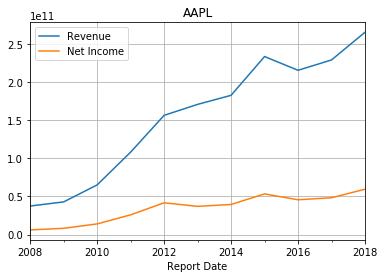

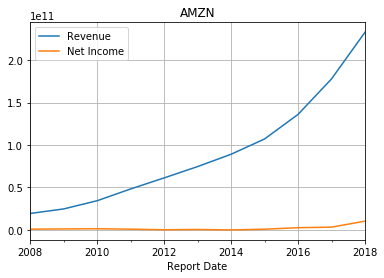

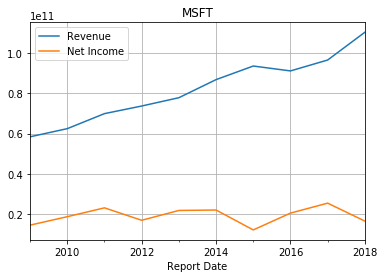

In [114]:
for ticker, df_grp in df.groupby(TICKER):
    df_grp.reset_index(TICKER)[[REVENUE, NET_INCOME]].plot(title=ticker, grid=True)

We can also filter a DataFrame so we only get the groups where some condition is met. For example, we can select the Tickers where all of their Net Income is positive. Because AMZN had losses in some years, it is filtered out.

In [115]:
# Apply a lambda function to each DataFrame sub-group.
func = lambda df_grp: (df_grp[NET_INCOME]>0.0).all()
df_result = df.groupby(TICKER).filter(func)

# Show two columns from the result.
df_result[[REVENUE, NET_INCOME]]

Revenue   Net Income
Ticker Report Date                           
AAPL   2008-09-30   3.749100e+10   6119000000
       2009-09-30   4.290500e+10   8235000000
       2010-09-30   6.522500e+10  14013000000
       2011-09-30   1.082490e+11  25922000000
       2012-09-30   1.565080e+11  41733000000
       2013-09-30   1.709100e+11  37037000000
       2014-09-30   1.827950e+11  39510000000
       2015-09-30   2.337150e+11  53394000000
       2016-09-30   2.156390e+11  45687000000
       2017-09-30   2.292340e+11  48351000000
       2018-09-30   2.655950e+11  59531000000
MSFT   2009-06-30   5.843700e+10  14569000000
       2010-06-30   6.248400e+10  18760000000
       2011-06-30   6.994300e+10  23150000000
       2012-06-30   7.372300e+10  16978000000
       2013-06-30   7.784900e+10  21863000000
       2014-06-30   8.683300e+10  22074000000
       2015-06-30   9.358000e+10  12193000000
       2016-06-30   9.115400e+10  20539000000
       2017-06-30   9.657100e+10  25489000000
       2018-06-30   1.103600e+11  16571000000

### GroupBy Helper-Function

We often need to apply a function to a DataFrame, where we don't know if it contains data for a single or multiple stocks. If the DataFrame contains data for multiple stocks, then we want to use `groupby` before applying the given function, so the function is applied on a per-stock basis. This is so common that simfin provides a helper-function for doing it.

In [116]:
# Get Income Statements for a few tickers and data-columns.
df = df_income.loc[tickers, [REVENUE, NET_INCOME]]

In [117]:
# Function that must be applied on a per-ticker basis.
def func(df):
    return df.sum()

# Apply the function to the data for a single ticker MSFT.
sf.apply(df=df.loc['MSFT'], func=func)

Revenue       8.209340e+11
Net Income    1.921860e+11
dtype: float64

In [118]:
# Apply the function to all the data grouped by the tickers.
sf.apply(df=df, func=func)

,Revenue,Net Income
Ticker,,
AAPL,1.708266e+12,3.795320e+11
AMZN,1.004235e+12,1.939700e+10
MSFT,8.209340e+11,1.921860e+11


By default the `sf.apply` function groups the data by the Ticker. If you are using another index such as `SIMFIN_ID`, then you simply pass it as an argument to the function: `sf.apply(df=df, func=func, group_index=SIMFIN_ID)`

## License (MIT)

This is published under the
[MIT License](https://github.com/simfin/simfin-tutorials/blob/master/LICENSE.txt)
which allows very broad use for both academic and commercial purposes.

You are very welcome to modify and use this source-code in your own project. Please keep a link to the [original repository](https://github.com/simfin/simfin-tutorials).
